# Projet : Consommation et production électrique en France

<img width=400 src="https://1.bp.blogspot.com/-_cw5mPFrxmc/XtuawSHRV0I/AAAAAAAAEWQ/52ff8l3-MKI0_ZdlJpwwyrH6tgh9diaOQCLcBGAsYHQ/s1600/uses-of-electricity-in-our-daily-life.jpg">
<p style="text-align: left"> Une  photo kitsch du réseau électrique </p>

## Présentation Du Dataset


<img src="../assets/image1.png" width="300"/>
<img src="../assets/image2.png" width="300"/>

**Informations issues du site (allez voir vous même également) :**

Ce jeu de données, rafraîchi une fois par jour, présente les données régionales de janvier 2013 à 2023. Elles sont issues de l'application éCO2mix. Elles sont élaborées à partir des comptages et complétées par des forfaits. 

Vous y trouverez au pas quart d'heure :

- Les prévisions de consommation établies la veille (J-1) et celles réactualisées le jour même (J).

Vous y trouverez au pas demi-heure :

- La consommation réalisée.
- La production selon les différentes filières composant le mix énergétique.
- La consommation des pompes dans les Stations de Transfert d'Energie par Pompage (STEP).
- Les échanges physiques aux frontières.
- Une estimation des émissions de carbone générées par la production d'électricité en France.
- Les échanges commerciaux aux frontières.
- Le découpage des filières par technologie du mix de production (débute en 2013).



<img src="../assets/image3.png" width="800"/>


## Objectifs et modalités de l'étude

**Modalités de l'étude :** 

- Vous travaillerez en groupe de 2 à 3.    
   
- Une présentation de votre travail sur une question sera effectuée en fin du projet. 
   
**Les objectifs de cette étude sont multiples :** 

- Apprendre à charger et manipuler des données réelles complexes avec Pandas. 

- Manipuler des séries temporelles. 

- Analyser des données pour répondre à une question exploratoire. 

- Présenter et vulgariser votre recherche exploratoire. 

**Notes sur les données RTE** :

- Elles proviennent du (génial) site éCO2mix et sont disponibles pour tout le monde (opendata) : https://www.rte-france.com/eco2mix 
- Données agrégées au niveau national : https://opendata.reseaux-energies.fr/explore/dataset/eco2mix-national-cons-def/information/?disjunctive.nature 
- Données agrégées au niveau régional : https://opendata.reseaux-energies.fr/explore/dataset/eco2mix-regional-cons-def/information/?disjunctive.libelle_region&disjunctive.nature

## Conseils & Remarques sur l'exploration des données

- La première étape de chargement, exploration et nettoyage de données peut être chronophage lorsqu'on traite des sets de données **réels**... Cela fait partie du travail de data scientist, il faut s'y faire :-)

> It takes less than five lines of code to train a basic machine learning algorithm. Exploratory data analysis and data preparation in comparison take longer and comprise of 80% of the data scientist’s time."  https://towardsdatascience.com/build-the-story-around-data-using-exploratory-data-analysis-and-pandas-c85bf3beff87

- Quand vous faîtes des recherches et que vous manipulez les données, n'oubliez pas de clarifier : **Quelle question/ hypothèse essayez-vous de résoudre/de prouver/ d'invalider ?**

- Votre notebook doit être **compréhensible**. Il doit vous permettre de partager vos recherches. Le lecteur final doit pouvoir le lire comme une histoire (collègue, vous dans un futur proche, etc.). Utilisez du **markdown** pour commenter votre code, discuter des résultats, insérer des images, ...

- **Table of Content** : mettez vous une table des matières et activez le **synchronize collapse state**. Ca vous permettre de vous y retrouver plus facilement. 

   
- Garantissez la **causalité** de votre notebook : l'ordre d'exécution des cellules dans un notebook est complexe. Ne faîtes pas l'erreur de ne pas vérifier que vous pouvez exécuter l'ensemble de vos cellules dans l'ordre. Sinon vous n'arriverez plus à exécuter votre notebook. 

- N'oubliez pas de reprendre les étapes d'exploration classiques des données vues précédemment (projets GapMinder, Arbres de Grenoble, ...) : afficher les informations sur vos dataframes, regardez les données, faites des sauvegardes intermédiaires (format .pkl par exemple), cherchez les outliers, les données manquantes, etc... 

- C'est une analyse exploratoire : **tatonnez**, **faîtes des graphiques**, ... 


- Lorsque c'est nécessaire (selon ce que vous cherchez) penser à normaliser/standardiser les données

- N'hésitez pas à **consulter l'aide de Pandas** ou à chercher la réponse à vos questions sur internet (quasiment tous les bugs que vous observerez on déjà fait l'objet d'un post sur **stackoverflow**)

**Ressources** :
-  Markdown : https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html
-  Table of content : https://jupyterlab.readthedocs.io/en/stable/user/toc.html. 

# Chargement et préparation des données

&#x1F4A5; **To Do** 

- Charger les données nationales.
 
- Regarder les colonnes, sélectionner les données intéressantes.
 
- Les types inférés semblent-ils corrects ? Corriger si nécessaire (datetime, object, int, float, etc.)

- Choisir des noms de colonnes plus faciles à manipuler (espaces, accents...). <br/>Ressource : https://www.dataschool.io/pandas-dot-notation-vs-brackets/

- Choisir un index adéquat pour votre dataframe. Les lignes ont un comportement étrange, choisissez les lignes qui vous arrangent.

- Quelle période temporelle couvrent les données ?

- Faîtes un choix par rapport aux valeurs manquantes. Les garder sous forme de NaN ou une autre valeur ?

- Simplifiez le DataFrame : regardez vos colonnnes, cherchez à les comprendre et rassemblez celles que vous pouvez rassembler. 

- Sauvegardez vos données sous format **pkl** pour ne pas devoir refaire les pré-traitements à chaque fois que vous redémarrez le kernel.  


&#x1F4A5; **Ressources**

- La doc de pandas.

- Voici quelques fonctions en vrac dont vous aurez besoin (read_csv,  info,  drop, to_datetime, astype, nunique, set_index)

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from pathlib import Path

plt.rcParams["figure.figsize"] = [12, 7]
plt.rcParams["figure.facecolor"] = "#f1f3f9"

In [17]:
IMAGES_PATH = Path().resolve().parent / "images"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [18]:
data_path = Path().resolve().parent / "data"

data_cons = pd.read_csv(data_path/"eco2mix-national-cons-def.csv", delimiter=";", parse_dates={'date':[2,3]})
data_cons_tr = pd.read_csv(data_path/"eco2mix-national-tr.csv", delimiter=";")

/tmp/ipykernel_6288/3110987333.py:3: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  data_cons = pd.read_csv(data_path/"eco2mix-national-cons-def.csv", delimiter=";", parse_dates={'date':[2,3]})
/tmp/ipykernel_6288/3110987333.py:3: DtypeWarning: Columns (23,28) have mixed types. Specify dtype option on import or set low_memory=False.
  data_cons = pd.read_csv(data_path/"eco2mix-national-cons-def.csv", delimiter=";", parse_dates={'date':[2,3]})
/tmp/ipykernel_6288/3110987333.py:4: DtypeWarning: Columns (13,14,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  data_cons_tr = pd.read_csv(data_path/"eco2mix-national-tr.csv", delimiter=";")


In [19]:
data_cons.head()

date Périmètre               Nature  \
0 2015-12-16 03:00:00    France  Données définitives   
1 2015-12-16 03:15:00    France  Données définitives   
2 2015-12-16 05:00:00    France  Données définitives   
3 2015-12-16 05:15:00    France  Données définitives   
4 2015-12-16 07:00:00    France  Données définitives   

               Date et Heure  Consommation (MW)  Prévision J-1 (MW)  \
0  2015-12-16T03:00:00+01:00            54421.0               53500   
1  2015-12-16T03:15:00+01:00                NaN               52950   
2  2015-12-16T05:00:00+01:00            52632.0               52300   
3  2015-12-16T05:15:00+01:00                NaN               53300   
4  2015-12-16T07:00:00+01:00            63733.0               64000   

   Prévision J (MW)  Fioul (MW)  Charbon (MW)  Gaz (MW)  ...  Gaz - TAC (MW)  \
0             53500       326.0        1280.0    2541.0  ...             3.0   
1             53050         NaN           NaN       NaN  ...             NaN   
2             52200       328.0        1274.0    2714.0  ...             3.0   
3             53150         NaN           NaN       NaN  ...             NaN   
4             63300       348.0        2263.0    5308.0  ...             3.0   

   Gaz - Cogénération (MW)  Gaz - CCG (MW)  Gaz - Autres (MW)  \
0                     2031           462.0               44.0   
1                      NaN             NaN                NaN   
2                     2023           643.0               44.0   
3                      NaN             NaN                NaN   
4                     2103          3167.0               35.0   

   Hydraulique - Fil de l'eau + éclusée (MW)  Hydraulique - Lacs (MW)  \
0                                     2146.0                    646.0   
1                                        NaN                      NaN   
2                                     2046.0                    468.0   
3                                        NaN                      NaN   
4                                     2716.0                   1011.0   

   Hydraulique - STEP turbinage (MW)  Bioénergies - Déchets (MW)  \
0                                0.0                       593.0   
1                                NaN                         NaN   
2                                0.0                       601.0   
3                                NaN                         NaN   
4                                0.0                       537.0   

   Bioénergies - Biomasse (MW)  Bioénergies - Biogaz (MW)  
0                        225.0                      222.0  
1                          NaN                        NaN  
2                        230.0                      222.0  
3                          NaN                        NaN  
4                        238.0                      222.0  

[5 rows x 36 columns]

In [20]:
data = data_cons.copy()

rename_dict = {
    'Périmètre': 'perimetre', 'Nature': 'nature', 'Date': 'date',
    'Heure': 'heure', 'Date et Heure': 'date_heure',
    'Consommation (MW)': 'consommation', 'Prévision J-1 (MW)': 'prevision_j1',
    'Prévision J (MW)': 'prevision_j', 'Fioul (MW)': 'fioul', 'Charbon (MW)': 'charbon',
    'Gaz (MW)': 'gaz', 'Nucléaire (MW)': 'nucleaire', 'Eolien (MW)': 'eolien',
    'Solaire (MW)': 'solaire', 'Hydraulique (MW)': 'hydraulique', 'Pompage (MW)': 'pompage',
    'Bioénergies (MW)': 'bioenergies', 'Ech. physiques (MW)': 'ech_physiques',
    'Taux de CO2 (g/kWh)': 'taux_co2', 'Ech. comm. Angleterre (MW)': 'ech_comm_angleterre',
    'Ech. comm. Espagne (MW)': 'ech_comm_espagne', 'Ech. comm. Italie (MW)': 'ech_comm_italie',
    'Ech. comm. Suisse (MW)': 'ech_comm_suisse',
    'Ech. comm. Allemagne-Belgique (MW)': 'ech_comm_allemagne_belgique',
    'Fioul - TAC (MW)': 'fioul_tac', 'Fioul - Cogénération (MW)': 'fioul_cogen',
    'Fioul - Autres (MW)': 'fioul_autres', 'Gaz - TAC (MW)': 'gaz_tac',
    'Gaz - Cogénération (MW)': 'gaz_cogen', 'Gaz - CCG (MW)': 'gaz_ccg',
    'Gaz - Autres (MW)': 'gaz_autres',
    'Hydraulique - Fil de l\'eau + éclusée (MW)': 'hydraulique_fil_eau_eclusee',
    'Hydraulique - Lacs (MW)': 'hydraulique_lacs',
    'Hydraulique - STEP turbinage (MW)': 'hydraulique_step_turbinage',
    'Bioénergies - Déchets (MW)': 'bioenergies_dechets',
    'Bioénergies - Biomasse (MW)': 'bioenergies_biomasse',
    'Bioénergies - Biogaz (MW)': 'bioenergies_biogaz'
}

data.rename(rename_dict, axis=1, inplace=True)

In [21]:
data["date"]

0        2015-12-16 03:00:00
1        2015-12-16 03:15:00
2        2015-12-16 05:00:00
3        2015-12-16 05:15:00
4        2015-12-16 07:00:00
                 ...        
378811   2020-12-31 12:30:00
378812   2020-12-31 13:30:00
378813   2020-12-31 15:45:00
378814   2020-12-31 16:00:00
378815   2020-12-31 19:00:00
Name: date, Length: 378816, dtype: datetime64[ns]

In [22]:
(data["date"].dt.date.min(), data["date"].dt.date.max())

(datetime.date(2012, 1, 1), datetime.date(2023, 1, 31))

The Dataset covers the period between January first of 2012 to January 31 of 2023

In [23]:
#data[["ech_comm_allemagne_belgique", "gaz_cogen"]] = data[["ech_comm_allemagne_belgique", "gaz_cogen"]].replace('ND', np.NaN)

#data[["ech_comm_allemagne_belgique", "gaz_cogen"]] = data[["ech_comm_allemagne_belgique", "gaz_cogen"]].astype("float64")

#data["date"] = pd.to_datetime(data["date"], format="%Y-%m-%d") # put column 'date' in datetime type
#data["heure"] = pd.to_datetime(data["heure"], format="%H:%M")  # put the column 'heure' in datetime type
#data['minute'] = data['heure'].dt.minute                       # create the column 'minute' by getting the minutes from 'heure'
#data['heure'] = [x.strftime("%H:%M") for x in data.heure]      # format the 'heure' column to be in HH:MM format
#data = data[data['minute'].isin([0, 30])]                      # retrieve only the data in thirty minute interval

#columns_to_drop = ["perimetre", "date_heure", "minute"]

#data.drop(columns_to_drop, axis=1, inplace=True)
#data.reset_index(inplace=True, drop=True)
#data.set_index("date", verify_integrity=True, inplace=True)

#data.info(verbose=True)

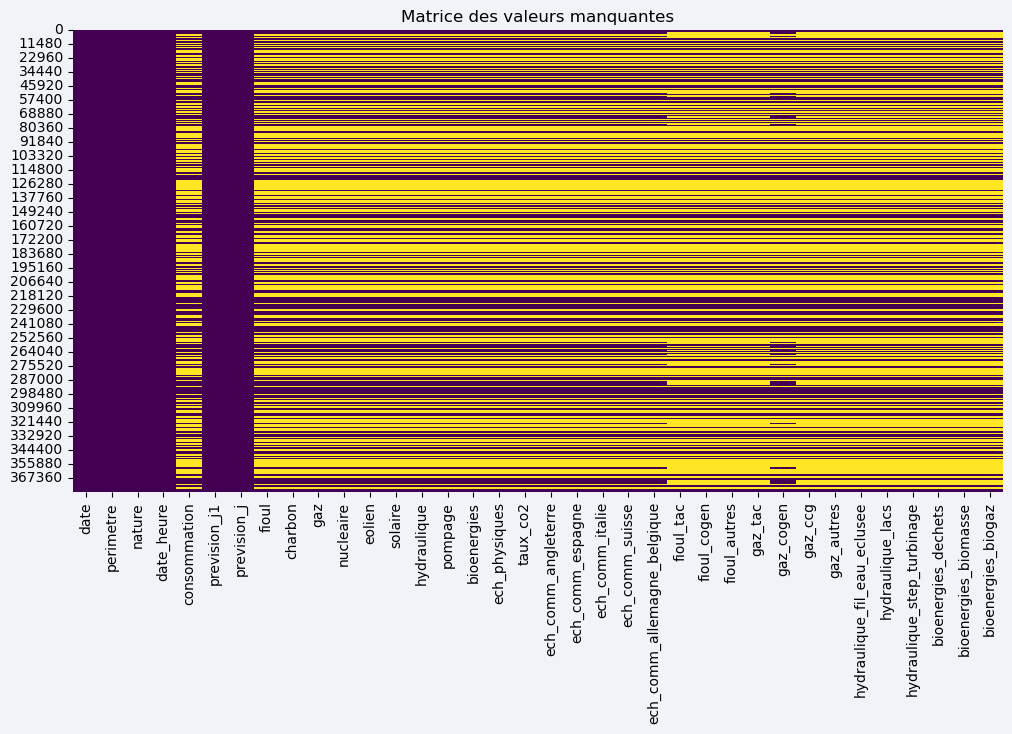

In [24]:
# Visualisation des données manquantes
plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Matrice des valeurs manquantes")
plt.show()

In [25]:
data.isnull().sum()

date                                0
perimetre                           0
nature                              0
date_heure                          0
consommation                   189409
prevision_j1                        0
prevision_j                         0
fioul                          189409
charbon                        189409
gaz                            189409
nucleaire                      189409
eolien                         189409
solaire                        189409
hydraulique                    189409
pompage                        189409
bioenergies                    189409
ech_physiques                  189409
taux_co2                       189409
ech_comm_angleterre            190040
ech_comm_espagne               189416
ech_comm_italie                189426
ech_comm_suisse                189416
ech_comm_allemagne_belgique    189436
fioul_tac                      206978
fioul_cogen                    206978
fioul_autres                   206978
gaz_tac     

In [26]:
data[["ech_comm_allemagne_belgique", "gaz_cogen"]] = data[["ech_comm_allemagne_belgique", "gaz_cogen"]].replace('ND', np.nan)

data[["ech_comm_allemagne_belgique", "gaz_cogen"]] = data[["ech_comm_allemagne_belgique", "gaz_cogen"]].astype("float64")

#data["date"] = pd.to_datetime(data["date"], format="%Y-%m-%d") # put column 'date' in datetime type
#data["heure"] = pd.to_datetime(data["heure"], format="%H:%M")  # put the column 'heure' in datetime type
data["minute"] = data["date"].dt.minute                         # create the column 'minute' by getting the minutes from 'heure'
#data['heure'] = [x.strftime("%H:%M") for x in data.heure]       # format the 'heure' column to be in HH:MM format
data = data[data['minute'].isin([0, 30])]                       # retrieve only the data in thirty minute interval

columns_to_drop = ["perimetre", "date_heure", "minute"]

data.drop(columns_to_drop, axis=1, inplace=True)
data.reset_index(inplace=True, drop=True)
data.set_index("date", verify_integrity=True, inplace=True)

data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 189408 entries, 2015-12-16 03:00:00 to 2020-12-31 19:00:00
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   nature                       189408 non-null  object 
 1   consommation                 189407 non-null  float64
 2   prevision_j1                 189408 non-null  int64  
 3   prevision_j                  189408 non-null  int64  
 4   fioul                        189407 non-null  float64
 5   charbon                      189407 non-null  float64
 6   gaz                          189407 non-null  float64
 7   nucleaire                    189407 non-null  float64
 8   eolien                       189407 non-null  float64
 9   solaire                      189407 non-null  float64
 10  hydraulique                  189407 non-null  float64
 11  pompage                      189407 non-null  float64
 12  bioenergies             

In [27]:
start_date = data.index.min()
end_date = data.index.max()
print(f"The dataset covers the period from {start_date} to {end_date}.")

The dataset covers the period from 2012-01-01 00:00:00 to 2023-01-31 23:30:00.


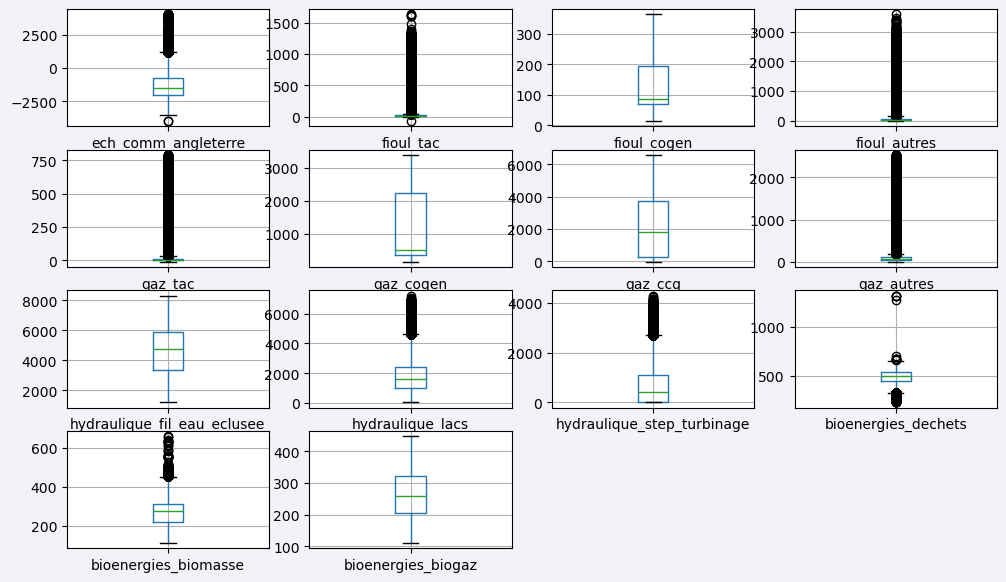

In [28]:
fig = plt.figure()

ax1 = fig.add_subplot(4, 4, 1)
ax2 = fig.add_subplot(4, 4, 2)
ax3 = fig.add_subplot(4, 4, 3)
ax4 = fig.add_subplot(4, 4, 4)
ax5 = fig.add_subplot(4, 4, 5)
ax6 = fig.add_subplot(4, 4, 6)
ax7 = fig.add_subplot(4, 4, 7)
ax8 = fig.add_subplot(4, 4, 8)
ax9 = fig.add_subplot(4, 4, 9)
ax10 = fig.add_subplot(4, 4, 10)
ax11 = fig.add_subplot(4, 4, 11)
ax12 = fig.add_subplot(4, 4, 12)
ax13 = fig.add_subplot(4, 4, 13)
ax14 = fig.add_subplot(4, 4, 14)

data.boxplot(column=["ech_comm_angleterre"], ax=ax1)
data.boxplot(column=["fioul_tac"], ax=ax2)
data.boxplot(column=["fioul_cogen"], ax=ax3)
data.boxplot(column=["fioul_autres"], ax=ax4)
data.boxplot(column=["gaz_tac"], ax=ax5)
data.boxplot(column=["gaz_cogen"], ax=ax6)
data.boxplot(column=["gaz_ccg"], ax=ax7)
data.boxplot(column=["gaz_autres"], ax=ax8)
data.boxplot(column=["hydraulique_fil_eau_eclusee"], ax=ax9)
data.boxplot(column=["hydraulique_lacs"], ax=ax10)
data.boxplot(column=["hydraulique_step_turbinage"], ax=ax11)
data.boxplot(column=["bioenergies_dechets"], ax=ax12)
data.boxplot(column=["bioenergies_biomasse"], ax=ax13)
data.boxplot(column=["bioenergies_biogaz"], ax=ax14)

plt.show()

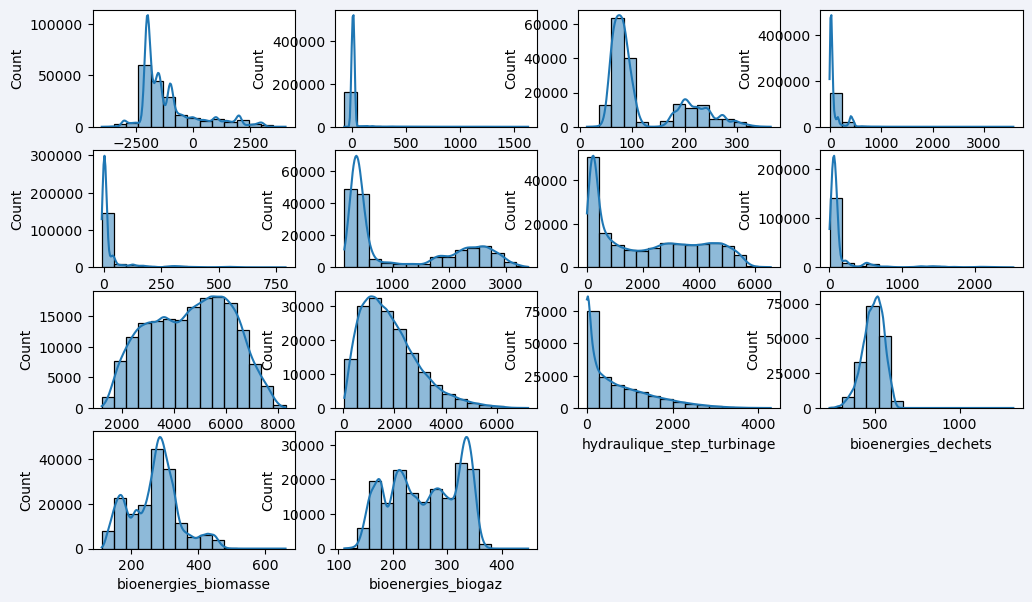

In [29]:
fig = plt.figure()

ax1 = fig.add_subplot(4, 4, 1)
ax2 = fig.add_subplot(4, 4, 2)
ax3 = fig.add_subplot(4, 4, 3)
ax4 = fig.add_subplot(4, 4, 4)
ax5 = fig.add_subplot(4, 4, 5)
ax6 = fig.add_subplot(4, 4, 6)
ax7 = fig.add_subplot(4, 4, 7)
ax8 = fig.add_subplot(4, 4, 8)
ax9 = fig.add_subplot(4, 4, 9)
ax10 = fig.add_subplot(4, 4, 10)
ax11 = fig.add_subplot(4, 4, 11)
ax12 = fig.add_subplot(4, 4, 12)
ax13 = fig.add_subplot(4, 4, 13)
ax14 = fig.add_subplot(4, 4, 14)

sns.histplot(data=data, x="ech_comm_angleterre", bins=15, kde=True, ax=ax1)
sns.histplot(data=data, x="fioul_tac", bins=15, kde=True, ax=ax2)
sns.histplot(data=data, x="fioul_cogen", bins=15, kde=True, ax=ax3)
sns.histplot(data=data, x="fioul_autres", bins=15, kde=True, ax=ax4)
sns.histplot(data=data, x="gaz_tac", bins=15, kde=True, ax=ax5)
sns.histplot(data=data, x="gaz_cogen", bins=15, kde=True, ax=ax6)
sns.histplot(data=data, x="gaz_ccg", bins=15, kde=True, ax=ax7)
sns.histplot(data=data, x="gaz_autres", bins=15, kde=True, ax=ax8)
sns.histplot(data=data, x="hydraulique_fil_eau_eclusee", bins=15, kde=True, ax=ax9)
sns.histplot(data=data, x="hydraulique_lacs", bins=15, kde=True, ax=ax10)
sns.histplot(data=data, x="hydraulique_step_turbinage", bins=15, kde=True, ax=ax11)
sns.histplot(data=data, x="bioenergies_dechets", bins=15, kde=True, ax=ax12)
sns.histplot(data=data, x="bioenergies_biomasse", bins=15, kde=True, ax=ax13)
sns.histplot(data=data, x="bioenergies_biogaz", bins=15, kde=True, ax=ax14)

plt.show()

In [30]:
fill_nan_cols = ["ech_comm_angleterre", "fioul_tac", "fioul_cogen", "fioul_autres",
                 "gaz_tac", "gaz_cogen", "gaz_ccg", "gaz_autres", 
                 "hydraulique_fil_eau_eclusee", "hydraulique_lacs",
                 "hydraulique_step_turbinage", "bioenergies_dechets",
                 "bioenergies_biomasse", "bioenergies_biogaz"]

for col in fill_nan_cols:
    data[col] = data[col].fillna(data[col].median())

for col, coltype in data.dtypes.items():
    if coltype != "object" and coltype != "datetime64[ns]":
        data[col] = data[col].fillna(data[col].mean())

In [31]:
data["ech_comm_total"] = (data["ech_comm_angleterre"] + data["ech_comm_espagne"] + 
                          data["ech_comm_italie"] + data["ech_comm_suisse"] + 
                          data["ech_comm_allemagne_belgique"])

data["ech_total"] = data["ech_comm_total"] + data["ech_physiques"]

data["cons_total_sans_ech_phys"] = (data["pompage"] + data["fioul"] + data["charbon"] + 
                                    data["gaz"] + data["nucleaire"] + data["eolien"] + 
                                    data["solaire"] + data["hydraulique"] + data["bioenergies"])

data["prod_fioul_total"] = data["fioul_tac"] + data["fioul_cogen"] + data["fioul_autres"]
data["prod_gaz_total"] = data["gaz_tac"] + data["gaz_cogen"] + data["gaz_ccg"] + data["gaz_autres"]
data["prod_hydraulique_total"] = data["hydraulique_fil_eau_eclusee"] + data["hydraulique_lacs"] + data["hydraulique_step_turbinage"]
data["prod_bioenergies_total"] = data["bioenergies_dechets"] + data["bioenergies_biomasse"] + data["bioenergies_biogaz"]

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 189408 entries, 2015-12-16 03:00:00 to 2020-12-31 19:00:00
Data columns (total 40 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   nature                       189408 non-null  object 
 1   consommation                 189408 non-null  float64
 2   prevision_j1                 189408 non-null  int64  
 3   prevision_j                  189408 non-null  int64  
 4   fioul                        189408 non-null  float64
 5   charbon                      189408 non-null  float64
 6   gaz                          189408 non-null  float64
 7   nucleaire                    189408 non-null  float64
 8   eolien                       189408 non-null  float64
 9   solaire                      189408 non-null  float64
 10  hydraulique                  189408 non-null  float64
 11  pompage                      189408 non-null  float64
 12  bioenergies             

In [33]:
data.head()

nature  consommation  prevision_j1  \
date                                                                   
2015-12-16 03:00:00  Données définitives       54421.0         53500   
2015-12-16 05:00:00  Données définitives       52632.0         52300   
2015-12-16 07:00:00  Données définitives       63733.0         64000   
2015-12-16 11:00:00  Données définitives       67650.0         67000   
2015-12-16 14:00:00  Données définitives       65899.0         64800   

                     prevision_j  fioul  charbon     gaz  nucleaire  eolien  \
date                                                                          
2015-12-16 03:00:00        53500  326.0   1280.0  2541.0    55263.0  4010.0   
2015-12-16 05:00:00        52200  328.0   1274.0  2714.0    56200.0  4138.0   
2015-12-16 07:00:00        63300  348.0   2263.0  5308.0    58001.0  4024.0   
2015-12-16 11:00:00        66800  351.0   2057.0  6687.0    58324.0  3415.0   
2015-12-16 14:00:00        65000  346.0   2156.0  6790.0    58564.0  3345.0   

                     solaire  ...  bioenergies_dechets  bioenergies_biomasse  \
date                          ...                                              
2015-12-16 03:00:00     -1.0  ...                593.0                 225.0   
2015-12-16 05:00:00     -1.0  ...                601.0                 230.0   
2015-12-16 07:00:00     -1.0  ...                537.0                 238.0   
2015-12-16 11:00:00   1215.0  ...                503.0                 239.0   
2015-12-16 14:00:00   1277.0  ...                529.0                 242.0   

                     bioenergies_biogaz  ech_comm_total  ech_total  \
date                                                                 
2015-12-16 03:00:00               222.0        -11690.0   -21548.0   
2015-12-16 05:00:00               222.0        -10885.0   -23189.0   
2015-12-16 07:00:00               222.0         -9983.0   -20371.0   
2015-12-16 11:00:00               218.0        -12284.0   -23945.0   
2015-12-16 14:00:00               222.0        -12230.0   -24833.0   

                     cons_total_sans_ech_phys  prod_fioul_total  \
date                                                              
2015-12-16 03:00:00                   64280.0             325.0   
2015-12-16 05:00:00                   64936.0             328.0   
2015-12-16 07:00:00                   74121.0             348.0   
2015-12-16 11:00:00                   79310.0             350.0   
2015-12-16 14:00:00                   78502.0             345.0   

                     prod_gaz_total  prod_hydraulique_total  \
date                                                          
2015-12-16 03:00:00          2540.0                  2792.0   
2015-12-16 05:00:00          2713.0                  2514.0   
2015-12-16 07:00:00          5308.0                  3727.0   
2015-12-16 11:00:00          6687.0                  6342.0   
2015-12-16 14:00:00          6790.0                  5039.0   

                     prod_bioenergies_total  
date                                         
2015-12-16 03:00:00                  1040.0  
2015-12-16 05:00:00                  1053.0  
2015-12-16 07:00:00                   997.0  
2015-12-16 11:00:00                   960.0  
2015-12-16 14:00:00                   993.0  

[5 rows x 40 columns]

#### **Note**:

Some columns can be summed together, like for example the "ech_comm_x" where x are countries like angleterre, espagne etc
Or the "fioul_x", "gaz_y", "bioenergies_z" etc: they can be summed together if we don't mind in losing specific granular information and only care about the absolute total quantity.

In [34]:
data.to_pickle(data_path/"eco2mix-national-cons-def-treated.pkl")

# Exploration du dataset National

In [35]:
data_cons_df = pd.read_pickle(data_path/"eco2mix-national-cons-def-treated.pkl")
data_cons_df.head()

nature  consommation  prevision_j1  \
date                                                                   
2015-12-16 03:00:00  Données définitives       54421.0         53500   
2015-12-16 05:00:00  Données définitives       52632.0         52300   
2015-12-16 07:00:00  Données définitives       63733.0         64000   
2015-12-16 11:00:00  Données définitives       67650.0         67000   
2015-12-16 14:00:00  Données définitives       65899.0         64800   

                     prevision_j  fioul  charbon     gaz  nucleaire  eolien  \
date                                                                          
2015-12-16 03:00:00        53500  326.0   1280.0  2541.0    55263.0  4010.0   
2015-12-16 05:00:00        52200  328.0   1274.0  2714.0    56200.0  4138.0   
2015-12-16 07:00:00        63300  348.0   2263.0  5308.0    58001.0  4024.0   
2015-12-16 11:00:00        66800  351.0   2057.0  6687.0    58324.0  3415.0   
2015-12-16 14:00:00        65000  346.0   2156.0  6790.0    58564.0  3345.0   

                     solaire  ...  bioenergies_dechets  bioenergies_biomasse  \
date                          ...                                              
2015-12-16 03:00:00     -1.0  ...                593.0                 225.0   
2015-12-16 05:00:00     -1.0  ...                601.0                 230.0   
2015-12-16 07:00:00     -1.0  ...                537.0                 238.0   
2015-12-16 11:00:00   1215.0  ...                503.0                 239.0   
2015-12-16 14:00:00   1277.0  ...                529.0                 242.0   

                     bioenergies_biogaz  ech_comm_total  ech_total  \
date                                                                 
2015-12-16 03:00:00               222.0        -11690.0   -21548.0   
2015-12-16 05:00:00               222.0        -10885.0   -23189.0   
2015-12-16 07:00:00               222.0         -9983.0   -20371.0   
2015-12-16 11:00:00               218.0        -12284.0   -23945.0   
2015-12-16 14:00:00               222.0        -12230.0   -24833.0   

                     cons_total_sans_ech_phys  prod_fioul_total  \
date                                                              
2015-12-16 03:00:00                   64280.0             325.0   
2015-12-16 05:00:00                   64936.0             328.0   
2015-12-16 07:00:00                   74121.0             348.0   
2015-12-16 11:00:00                   79310.0             350.0   
2015-12-16 14:00:00                   78502.0             345.0   

                     prod_gaz_total  prod_hydraulique_total  \
date                                                          
2015-12-16 03:00:00          2540.0                  2792.0   
2015-12-16 05:00:00          2713.0                  2514.0   
2015-12-16 07:00:00          5308.0                  3727.0   
2015-12-16 11:00:00          6687.0                  6342.0   
2015-12-16 14:00:00          6790.0                  5039.0   

                     prod_bioenergies_total  
date                                         
2015-12-16 03:00:00                  1040.0  
2015-12-16 05:00:00                  1053.0  
2015-12-16 07:00:00                   997.0  
2015-12-16 11:00:00                   960.0  
2015-12-16 14:00:00                   993.0  

[5 rows x 40 columns]

In [36]:
data_cons_df.describe()

consommation   prevision_j1    prevision_j          fioul  \
count  189408.000000  189408.000000  189408.000000  189408.000000   
mean    53881.629317   53577.568308   53495.096015     274.959431   
std     12054.167042   12004.690118   12002.213353     283.613870   
min     29124.000000   28500.000000       0.000000      18.000000   
25%     44681.000000   44400.000000   44400.000000      98.000000   
50%     52116.000000   51800.000000   51800.000000     208.000000   
75%     62201.000000   61800.000000   61700.000000     364.000000   
max    102098.000000  101000.000000  102700.000000    5926.000000   

             charbon            gaz      nucleaire         eolien  \
count  189408.000000  189408.000000  189408.000000  189408.000000   
mean      897.805350    3478.952341   43060.794385    3040.848005   
std      1129.127064    2474.419593    7994.175478    2659.300769   
min      -133.000000     234.000000   19164.000000      21.000000   
25%        15.000000    1132.000000   38405.000000    1176.000000   
50%       484.000000    3085.000000   42624.500000    2178.000000   
75%      1479.000000    5146.000000   48440.000000    4020.000000   
max      6265.000000   10611.000000   61712.000000   16363.000000   

             solaire    hydraulique  ...  bioenergies_dechets  \
count  189408.000000  189408.000000  ...        189408.000000   
mean     1086.140132    7143.218081  ...           487.833054   
std      1745.948059    2791.299743  ...            59.596914   
min       -23.000000    1387.000000  ...           229.000000   
25%         0.000000    5014.000000  ...           453.000000   
50%        16.000000    6910.000000  ...           493.000000   
75%      1675.000000    9028.000000  ...           528.000000   
max     10863.000000   17948.000000  ...          1318.000000   

       bioenergies_biomasse  bioenergies_biogaz  ech_comm_total  \
count         189408.000000       189408.000000   189408.000000   
mean             270.690045          258.332383    -5002.134317   
std               71.243396           60.668314     4712.254430   
min              111.000000          111.000000   -17415.000000   
25%              225.000000          209.000000    -8358.000000   
50%              277.000000          260.000000    -5608.000000   
75%              307.000000          316.000000    -2356.750000   
max              661.000000          448.000000    14862.000000   

           ech_total  cons_total_sans_ech_phys  prod_fioul_total  \
count  189408.000000             189408.000000     189408.000000   
mean   -10282.587800              59173.811512        236.421851   
std      9367.424804              11308.443148        232.880680   
min    -35153.000000              27171.000000         12.000000   
25%    -16955.250000              50835.000000         94.000000   
50%    -11505.000000              58047.000000        140.000000   
75%     -5044.750000              67158.000000        312.000000   
max     29441.000000              95920.000000       4224.000000   

       prod_gaz_total  prod_hydraulique_total  prod_bioenergies_total  
count   189408.000000           189408.000000           189408.000000  
mean      3435.665468             7101.763231             1016.855481  
std       2391.516327             2672.070581              154.529691  
min        235.000000             1387.000000              497.000000  
25%       1516.000000             5215.000000              937.000000  
50%       2799.000000             6767.000000             1030.000000  
75%       4944.000000             8776.000000             1125.000000  
max      10611.000000            17948.000000             2024.000000  

[8 rows x 39 columns]

## Réflexion

Avant de vous lancer dans la mise en pratique, prenez quelques minutes (max 30 minutes) pour observer les données et explorer les premières statistiques descriptives : 
- Quelles questions vous posez-vous sur les données ? 

- Qu'avez-vous envie d'explorer ? Soyez créatifs !

## Mise en application

&#x1F4A5; **To Do**
    
L'objectif ici est de **comprendre les données** présentes dans le dataset national que vous avez créé. 

---
- **Affichez vos données pour mieux les comprendre** : choisir plusieurs durées pour afficher vos données : semaine, mois, année, durée totale, faîtes des comparaisons... (pensez à utiliser des choses comme rolling mean) 
    - Tracer l'évolution de la consommation
    - Tracer l'évolution de la production par source d'énergie et au niveau global,
    - Tracer l'évolution de émissions de CO2.

---

- **Mix énergétique** :
    - Trouvez plusieurs manières de visualiser les données de production : plot, pie chart, rolling mean...
    - Quelle est la source de production largement majoritaire ?
    - Quelle est l'évolution de la part des énergies fossiles dans le mix énergétique ?  
    - Quelle est l'évolution de la part des énergies renouvelables dans le mix énergétique français ?
    - Quelle est la part de chaque filière de production d'énergies renouvelables (hydraulique, solaire, ...) 

---

- **Autonomie électrique** :
    - comparer la production totale française à la consommation totale. Quelle est le taux d'indépendance énergétique de la france au cours du temps ? C'est à dire la proportion du temps où la France est autonome en énergie. Faire le caclul sur la durée totale mais aussi par année et par mois.
    - Trouver les outliers    
---

- **Equilibre du réseau électrique** : Vérifier que la production, la consommation et les échanges commerciaux s'équilibrent en permanence. <br/> Ressource pour comprendre : https://fr.wikipedia.org/wiki/Ajustement_offre-demande_d%27%C3%A9lectricit%C3%A9 

---

- **Analyser la tendance des données** :
    - Analyser la saisonnalité des productions, comparer les mois de l'année entre eux. Quand consomme-t-on le plus ?
    - Printemps vs Eté vs Automne vs Hiver ?
    - Quelle est la tendance générale de l'évolution à long terme de la production d'énergie solaire ?
    - Quelle est la tendance générale de l'évolution à long terme de l'émission de CO2 ?

---

- **Impact des sources primaires de production sur le Taux de CO2** :
    - Corrélez les données entre elles et déduisez-en l'impact positif ou négatif de chacune des sources de production sur l'estimation du taux de CO2 émis.
    <br/> **Pandas** : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
    <br/> **Théorie** : https://data36.com/correlation-definition-calculation-corr-pandas/

---
- [Bonus] **Analyser les périodicités des données** :
    - Réaliser une analyse de Fourier de vos séries temporelles
      <br/> **Théorie et pratique** : https://realpython.com/python-scipy-fft/

---

- **Géopolitique** :
    - Visualisez et analysez l'impact du COVID et de la guerre en Ukraine sur le réseau électrique ?

---

&#x1F4A5; **Aide**
- Ressource utile pour vous aider à analyser les données : https://www.statistiques.developpement-durable.gouv.fr/edition-numerique/bilan-energetique-2020/
- `pandas.DataFrame.rolling` vous aidera à afficher vos données et en comprendre les tendances. 
- Les `pandas.Grouper` vous aideront pour grouper les données temporelles.
- la méthode `.plot()` fonctionne parfaitement avec un datetime en index
- Corrélation : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
- attention aux `NaN` pour les plots.

---

---

---

---

### Part 1

- **Affichez vos données pour mieux les comprendre** : choisir plusieurs durées pour afficher vos données : semaine, mois, année, durée totale, faîtes des comparaisons... (pensez à utiliser des choses comme rolling mean) 
    - Tracer l'évolution de la consommation
    - Tracer l'évolution de la production par source d'énergie et au niveau global,
    - Tracer l'évolution de émissions de CO2.

#### Consommation

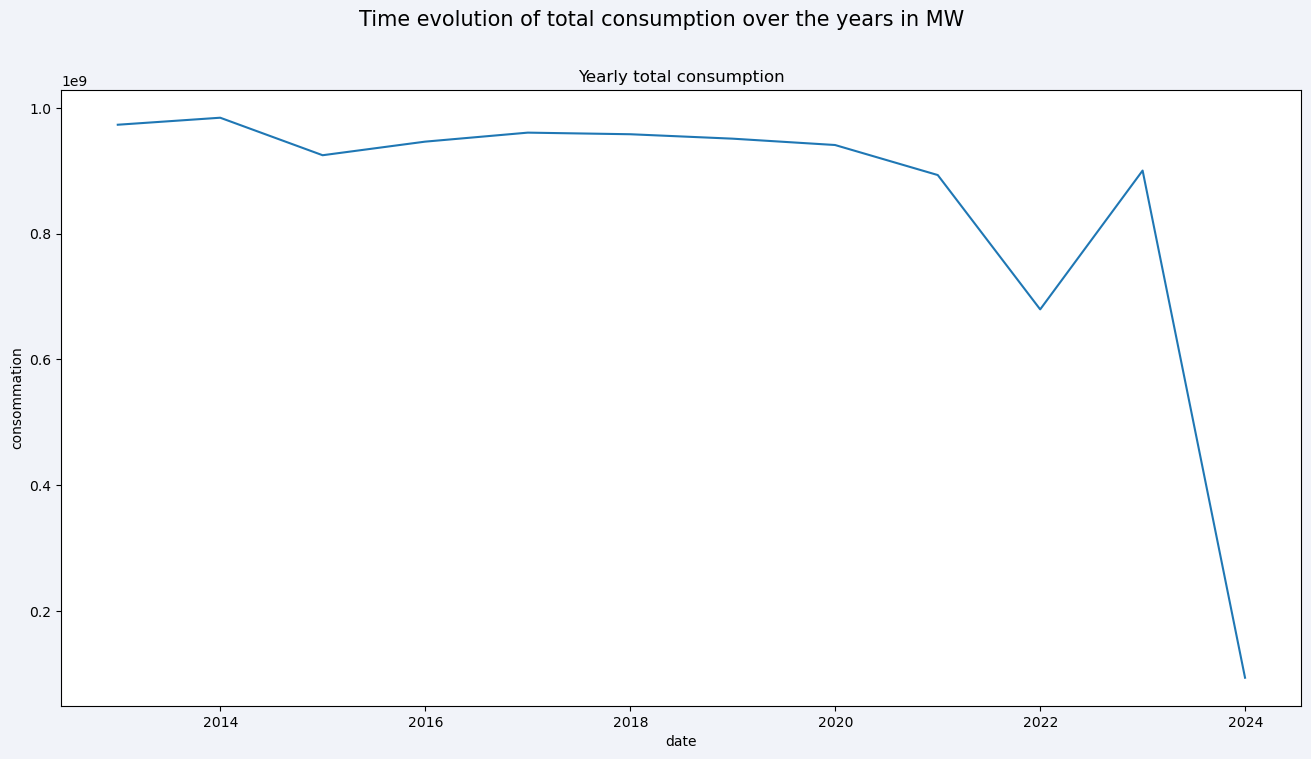

In [37]:
fig = plt.figure(figsize=(16,8))

ax = fig.add_subplot()

sns.lineplot(data=data_cons_df.resample('1YE').consommation.sum(),ax=ax)


ax.set_title("Yearly total consumption")

fig.suptitle("Time evolution of total consumption over the years in MW", fontsize=15)

plt.show()

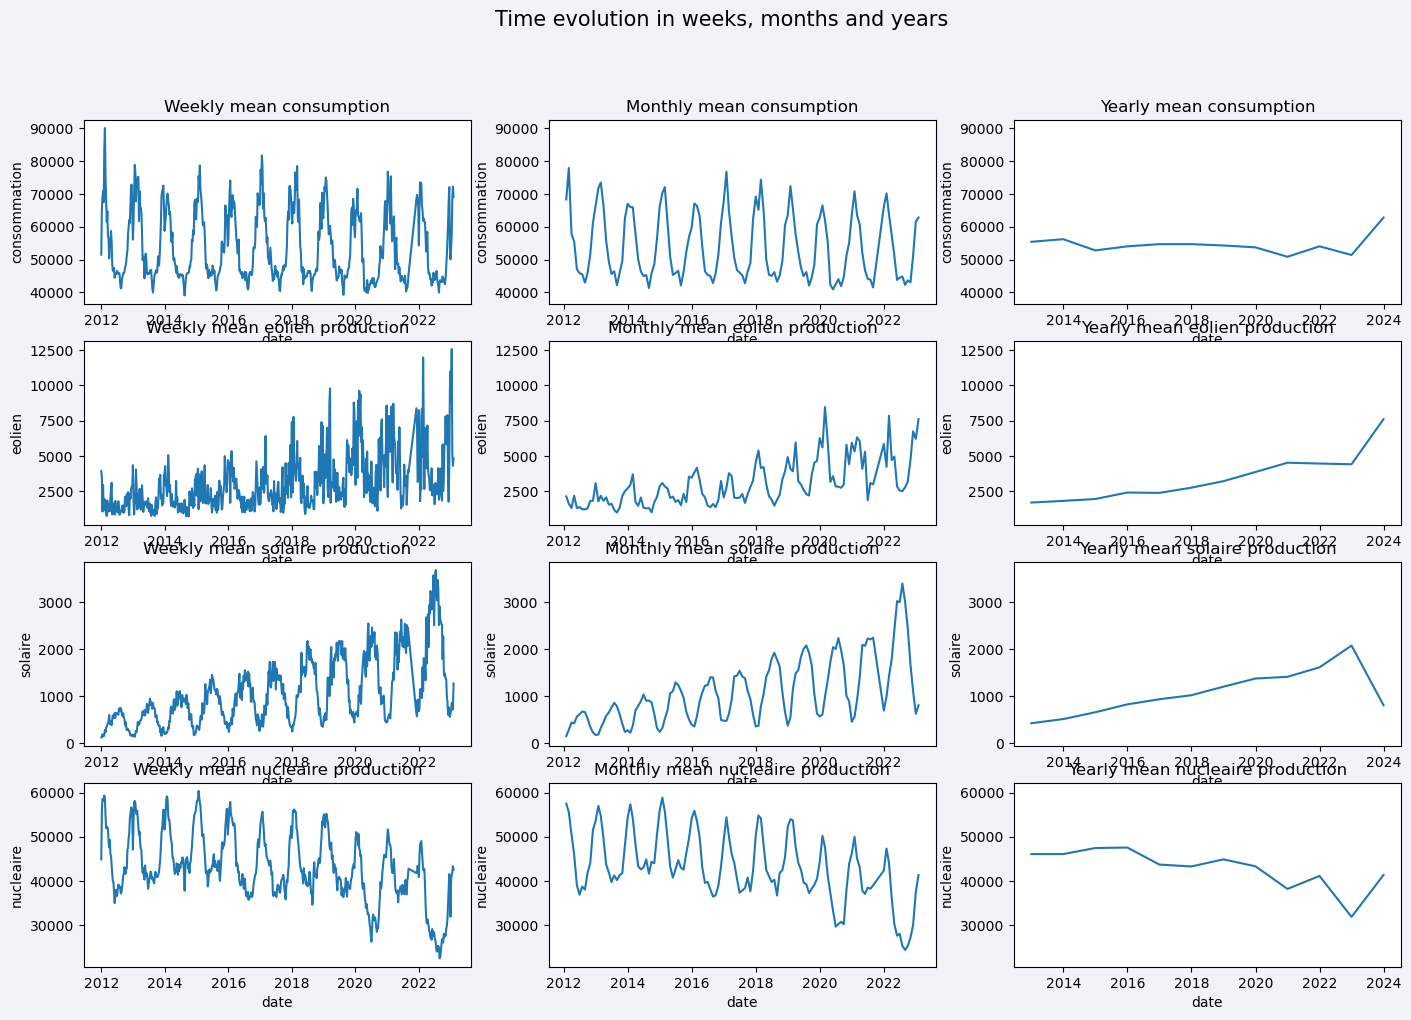

In [38]:
fig = plt.figure(figsize=(17,11))

ax1 = fig.add_subplot(4, 3, 1)
ax2 = fig.add_subplot(4, 3, 2, sharey = ax1)
ax3 = fig.add_subplot(4, 3, 3, sharey = ax1)

ax4 = fig.add_subplot(4, 3, 4)
ax5 = fig.add_subplot(4, 3, 5, sharey = ax4)
ax6 = fig.add_subplot(4, 3, 6, sharey = ax4)

ax7 = fig.add_subplot(4, 3, 7)
ax8 = fig.add_subplot(4, 3, 8, sharey = ax7)
ax9 = fig.add_subplot(4, 3, 9, sharey = ax7)

ax10 = fig.add_subplot(4, 3, 10)
ax11 = fig.add_subplot(4, 3, 11, sharey = ax10)
ax12 = fig.add_subplot(4, 3, 12, sharey = ax11)

sns.lineplot(data=data_cons_df.resample('1W').consommation.mean(),ax=ax1)
sns.lineplot(data=data_cons_df.resample('1ME').consommation.mean(),ax=ax2)
sns.lineplot(data=data_cons_df.resample('1YE').consommation.mean(),ax=ax3)

sns.lineplot(data=data_cons_df.resample('1W').eolien.mean(),ax=ax4)
sns.lineplot(data=data_cons_df.resample('1ME').eolien.mean(),ax=ax5)
sns.lineplot(data=data_cons_df.resample('1YE').eolien.mean(),ax=ax6)

sns.lineplot(data=data_cons_df.resample('1W').solaire.mean(),ax=ax7)
sns.lineplot(data=data_cons_df.resample('1ME').solaire.mean(),ax=ax8)
sns.lineplot(data=data_cons_df.resample('1YE').solaire.mean(),ax=ax9)

sns.lineplot(data=data_cons_df.resample('1W').nucleaire.mean(),ax=ax10)
sns.lineplot(data=data_cons_df.resample('1ME').nucleaire.mean(),ax=ax11)
sns.lineplot(data=data_cons_df.resample('1YE').nucleaire.mean(),ax=ax12)

ax1.set_title("Weekly mean consumption")
ax2.set_title("Monthly mean consumption")
ax3.set_title("Yearly mean consumption")
ax4.set_title("Weekly mean eolien production")
ax5.set_title("Monthly mean eolien production")
ax6.set_title("Yearly mean eolien production")
ax7.set_title("Weekly mean solaire production")
ax8.set_title("Monthly mean solaire production")
ax9.set_title("Yearly mean solaire production")
ax10.set_title("Weekly mean nucleaire production")
ax11.set_title("Monthly mean nucleaire production")
ax12.set_title("Yearly mean nucleaire production")

fig.suptitle("Time evolution in weeks, months and years", fontsize=15)

plt.show()

#### CO2 emission

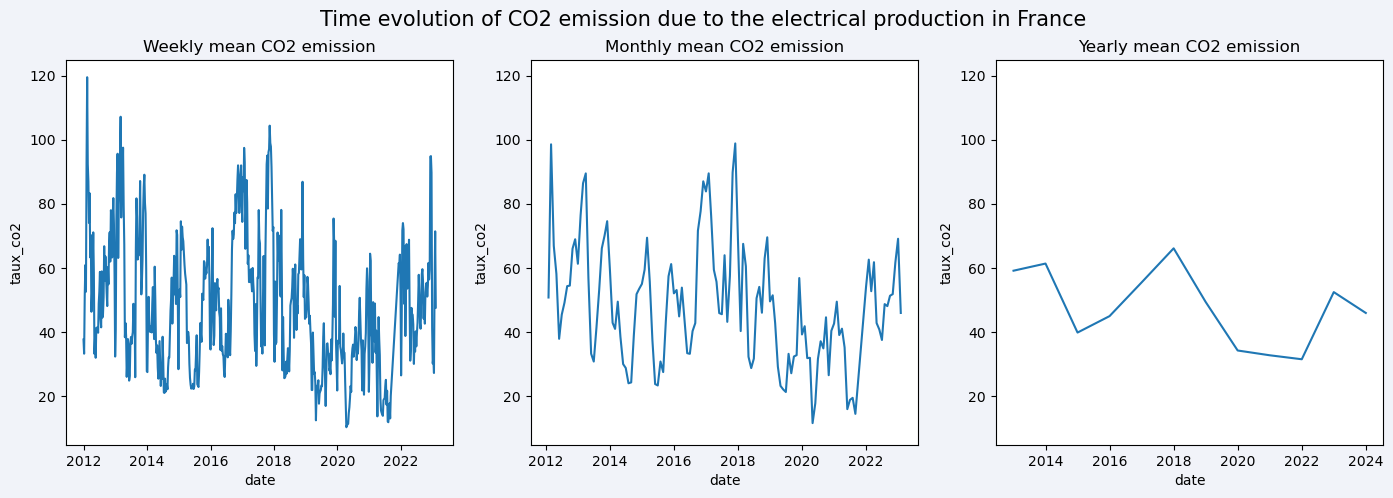

In [39]:
fig = plt.figure(figsize=(17,5))

ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2, sharey = ax1)
ax3 = fig.add_subplot(1, 3, 3, sharey = ax1)

sns.lineplot(data=data_cons_df.resample('1W').taux_co2.mean(),ax=ax1)
sns.lineplot(data=data_cons_df.resample('1ME').taux_co2.mean(),ax=ax2)
sns.lineplot(data=data_cons_df.resample('1YE').taux_co2.mean(),ax=ax3)

ax1.set_title("Weekly mean CO2 emission")
ax2.set_title("Monthly mean CO2 emission")
ax3.set_title("Yearly mean CO2 emission")

fig.suptitle("Time evolution of CO2 emission due to the electrical production in France", fontsize=15)

plt.show()

In [40]:
data_cons_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 189408 entries, 2015-12-16 03:00:00 to 2020-12-31 19:00:00
Data columns (total 40 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   nature                       189408 non-null  object 
 1   consommation                 189408 non-null  float64
 2   prevision_j1                 189408 non-null  int64  
 3   prevision_j                  189408 non-null  int64  
 4   fioul                        189408 non-null  float64
 5   charbon                      189408 non-null  float64
 6   gaz                          189408 non-null  float64
 7   nucleaire                    189408 non-null  float64
 8   eolien                       189408 non-null  float64
 9   solaire                      189408 non-null  float64
 10  hydraulique                  189408 non-null  float64
 11  pompage                      189408 non-null  float64
 12  bioenergies             

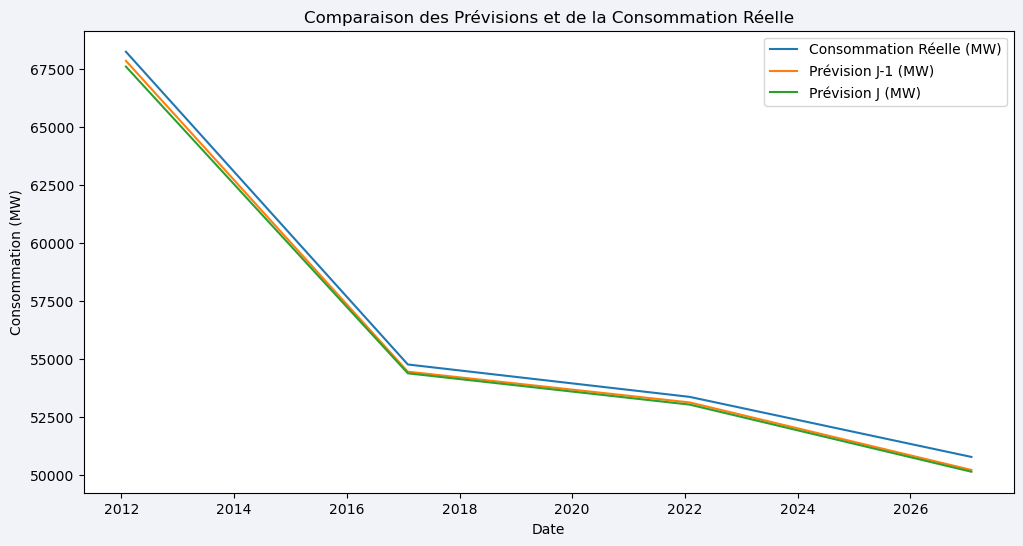

In [41]:
# Comparer les prévisions J-1 et J avec la consommation réelle
plt.figure(figsize=(12, 6))

sns.lineplot(data=data_cons_df.resample('1W').taux_co2.mean(),ax=ax1)


plt.plot(data_cons_df.resample("60ME")['consommation'].mean(), label='Consommation Réelle (MW)')
plt.plot(data_cons_df.resample("60ME")['prevision_j1'].mean(), label='Prévision J-1 (MW)')
plt.plot(data_cons_df.resample("60ME")['prevision_j'].mean(), label='Prévision J (MW)')
plt.xlabel('Date')
plt.ylabel('Consommation (MW)')
plt.title('Comparaison des Prévisions et de la Consommation Réelle')
plt.legend()
plt.show()

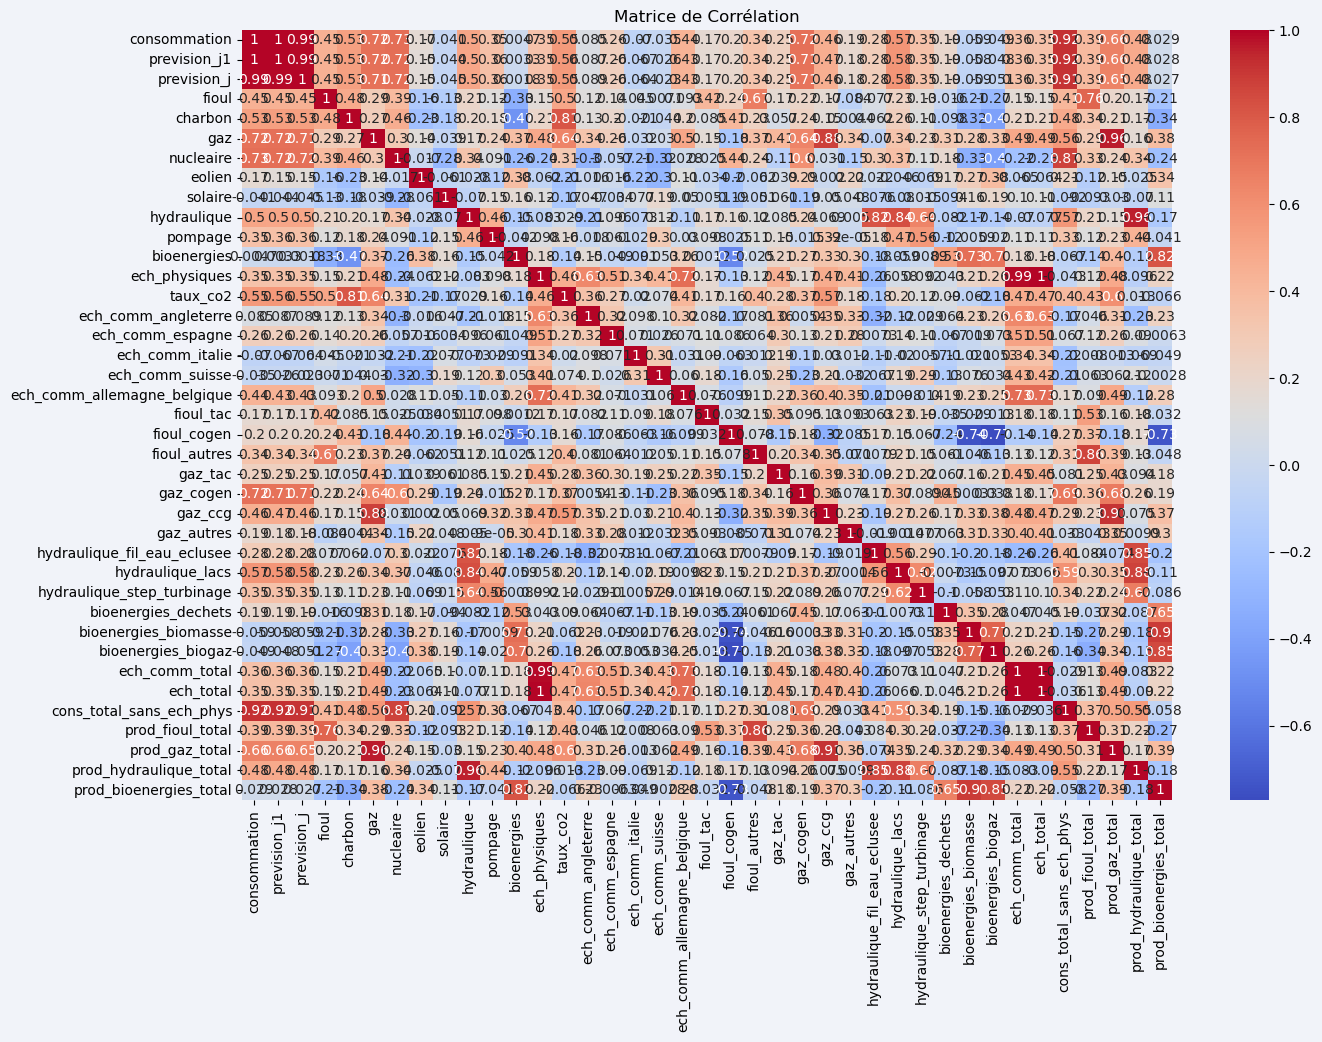

In [42]:
# Sélectionner les colonnes numériques uniquement
numeric_data_cons = data_cons_df.select_dtypes(include=['number'])

# Calcul de la matrice de corrélation
corr_matrix = numeric_data_cons.corr()

# Affichage de la heatmap de la matrice de corrélation
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de Corrélation')
plt.show()

### Part 2

- **Mix énergétique** :
    - Trouvez plusieurs manières de visualiser les données de production : plot, pie chart, rolling mean...
    - Quelle est la source de production largement majoritaire ?
    - Quelle est l'évolution de la part des énergies fossiles dans le mix énergétique ?  
    - Quelle est l'évolution de la part des énergies renouvelables dans le mix énergétique français ?
    - Quelle est la part de chaque filière de production d'énergies renouvelables (hydraulique, solaire, ...)

/tmp/ipykernel_6288/1997830956.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_2018_consommation_per_source = pd.concat([df_2018_consommation_per_source, pd.DataFrame(di, index=[0])], ignore_index=True)


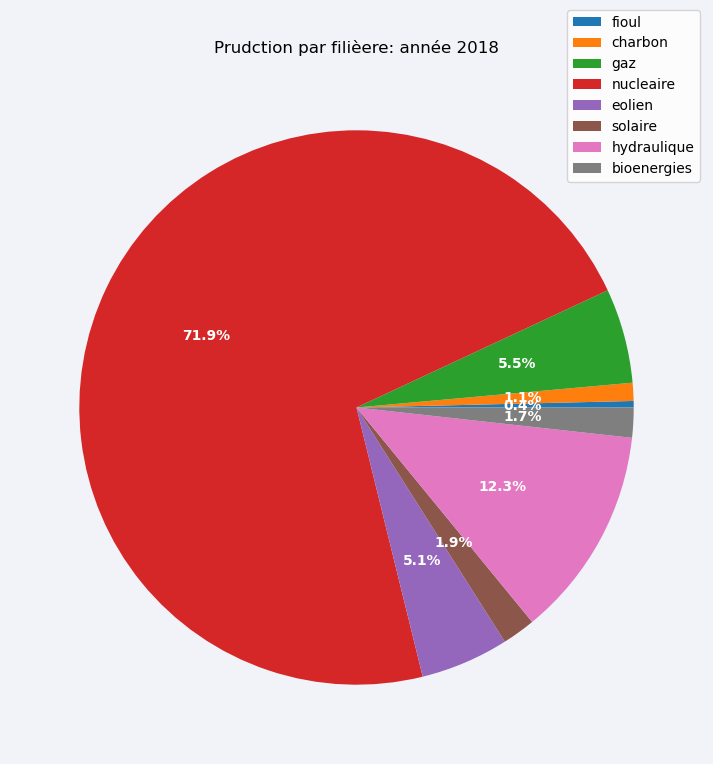

In [43]:
df_2018 = data_cons_df.loc['2018']

consommation_total_2018 = df_2018["consommation"].sum()

df_2018_consommation_per_source = pd.DataFrame(columns=["source", "percent"])

source_list = ["fioul", "charbon", "gaz", "nucleaire", "eolien",
                "solaire", "hydraulique", "pompage", "bioenergies"]

for source in source_list:

    x = (df_2018[source].sum() / consommation_total_2018) * 100
    di = {"source": source, "percent": x}
    df_2018_consommation_per_source = pd.concat([df_2018_consommation_per_source, pd.DataFrame(di, index=[0])], ignore_index=True)
    df_filtered = df_2018_consommation_per_source[df_2018_consommation_per_source["percent"] >= 0].dropna()

df_filtered["percent"] = (df_filtered['percent']/df_filtered['percent'].sum()) * 100

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%".format(pct, absolute)

fig, ax = plt.subplots(figsize=(9, 9), subplot_kw=dict(aspect="equal"))
wedges, texts, autotexts = ax.pie(df_filtered['percent'],
                                  autopct=lambda pct: func(pct, df_filtered['percent']),
                                  textprops=dict(color="w"))
ax.legend(wedges, df_filtered['source'],
          loc="center",
          bbox_to_anchor=(0.9, 0.3, 0, 1.3))
plt.setp(autotexts, size=10, weight="bold")
ax.set_title("Prudction par filièere: année 2018")
plt.show()

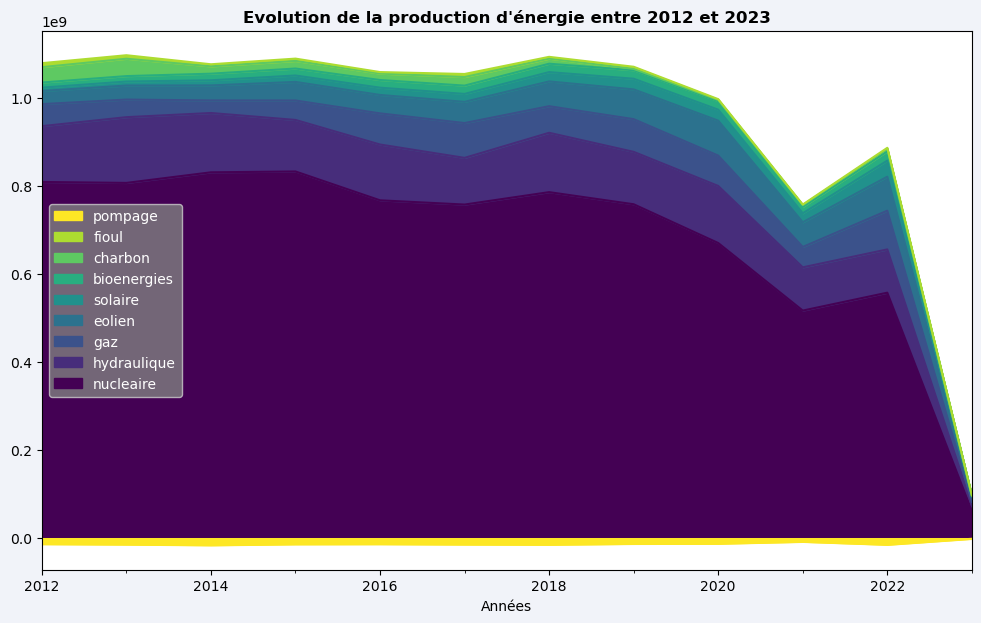

In [44]:
source_list = ["fioul", "charbon", "gaz", "nucleaire", "eolien",
                "solaire", "hydraulique", "pompage", "bioenergies"]

df_production = data_cons_df[source_list].resample("YE").sum()

# sort columns from the lowest to the highest source of energy production 
columns_sorted = df_production.sum().sort_values(ascending=False).index
df_production = df_production[columns_sorted]

df_production.plot(kind="area", colormap="viridis")

plt.xlabel("Années")
plt.title("Evolution de la production d'énergie entre 2012 et 2023", fontweight="bold")
plt.legend(reverse=True, labelcolor="w", frameon=True, facecolor="grey")

plt.show()

In [45]:
data_cons_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 189408 entries, 2015-12-16 03:00:00 to 2020-12-31 19:00:00
Data columns (total 40 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   nature                       189408 non-null  object 
 1   consommation                 189408 non-null  float64
 2   prevision_j1                 189408 non-null  int64  
 3   prevision_j                  189408 non-null  int64  
 4   fioul                        189408 non-null  float64
 5   charbon                      189408 non-null  float64
 6   gaz                          189408 non-null  float64
 7   nucleaire                    189408 non-null  float64
 8   eolien                       189408 non-null  float64
 9   solaire                      189408 non-null  float64
 10  hydraulique                  189408 non-null  float64
 11  pompage                      189408 non-null  float64
 12  bioenergies             

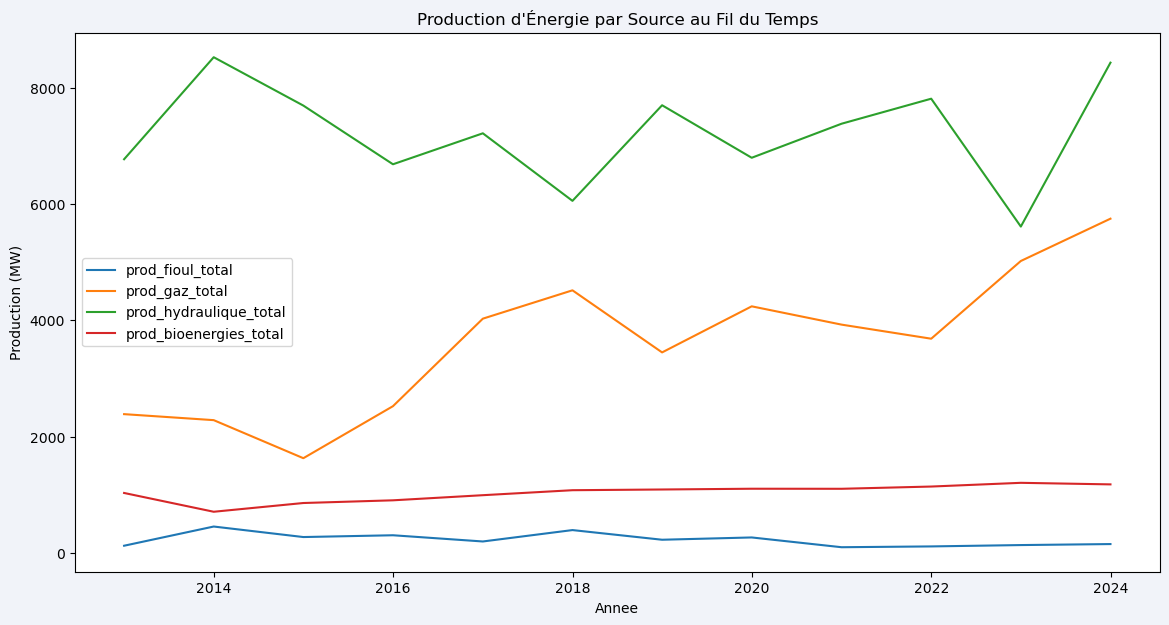

In [46]:
production_columns = [
    "prod_fioul_total", "prod_gaz_total", "prod_hydraulique_total",
    "prod_bioenergies_total"
]

production_data = data_cons_df[production_columns].copy()

production_data['total_production'] = production_data.sum(axis=1)

for col in production_columns:
    production_data[col + '_share'] = production_data[col] / production_data['total_production'] * 100

# Visualisation de la production d'énergie au fil du temps
plt.figure(figsize=(14, 7))
for col in production_columns:
    plt.plot(production_data.resample("1YE")[col].mean(), label=col)
plt.xlabel('Annee')
plt.ylabel('Production (MW)')
plt.title('Production d\'Énergie par Source au Fil du Temps')
plt.legend()
plt.show()

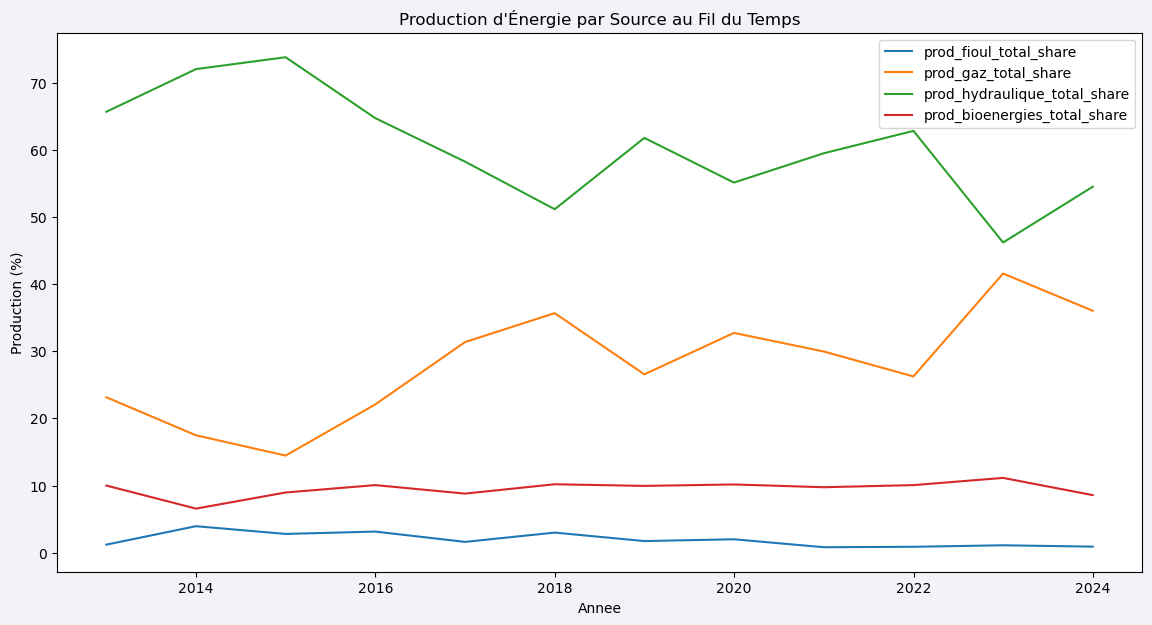

In [47]:
production_columns = [
    "prod_fioul_total", "prod_gaz_total", "prod_hydraulique_total",
    "prod_bioenergies_total"
]

production_data = data_cons_df[production_columns].copy()

production_data['total_production'] = production_data.sum(axis=1)

for col in production_columns:
    production_data[col + '_share'] = production_data[col] / production_data['total_production'] * 100

# Visualisation de la production d'énergie au fil du temps
plt.figure(figsize=(14, 7))
for col in production_columns:
    plt.plot(production_data.resample("1YE")[col + '_share'].mean(), label=col + '_share')
plt.xlabel('Annee')
plt.ylabel('Production (%)')
plt.title('Production d\'Énergie par Source au Fil du Temps')
plt.legend()
plt.show()

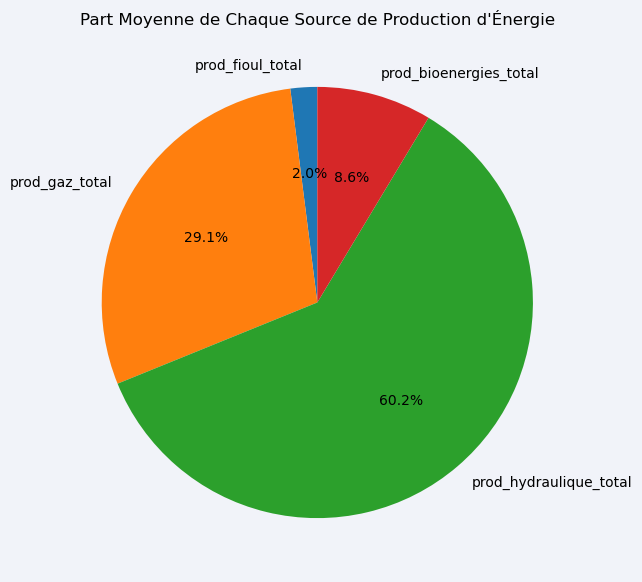

In [48]:
# Graphique en secteurs pour visualiser la part de chaque source de production
average_shares = production_data[production_columns].mean()

plt.figure(figsize=(10, 7))
average_shares.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Part Moyenne de Chaque Source de Production d\'Énergie')
plt.ylabel('')
plt.show()

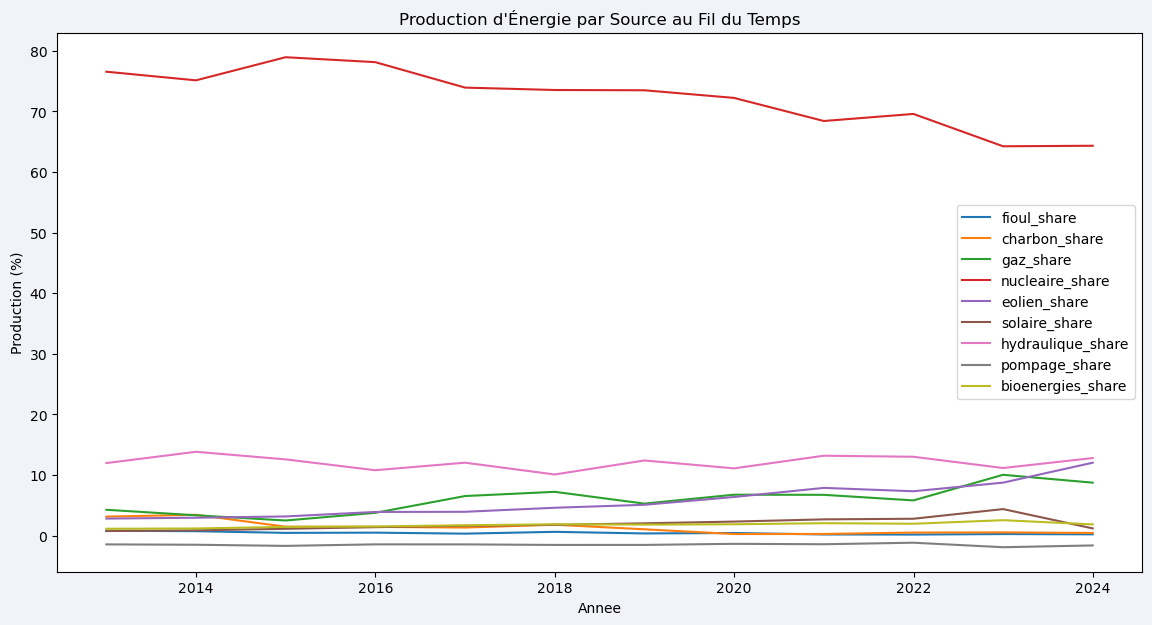

In [49]:
source_list = ['fioul', 'charbon', 'gaz', 'nucleaire',
               'eolien', 'solaire', 'hydraulique', 'pompage',
               'bioenergies']

production_data = data_cons_df[source_list].copy()

production_data['total_production'] = production_data.sum(axis=1)

for col in source_list:
    production_data[col + '_share'] = production_data[col] / production_data['total_production'] * 100

# Visualisation de la production d'énergie au fil du temps
plt.figure(figsize=(14, 7))
for col in source_list:
    plt.plot(production_data.resample("1YE")[col + '_share'].mean(), label=col + '_share')
plt.xlabel('Annee')
plt.ylabel('Production (%)')
plt.title('Production d\'Énergie par Source au Fil du Temps')
plt.legend()
plt.show()

#### Rolling mean:

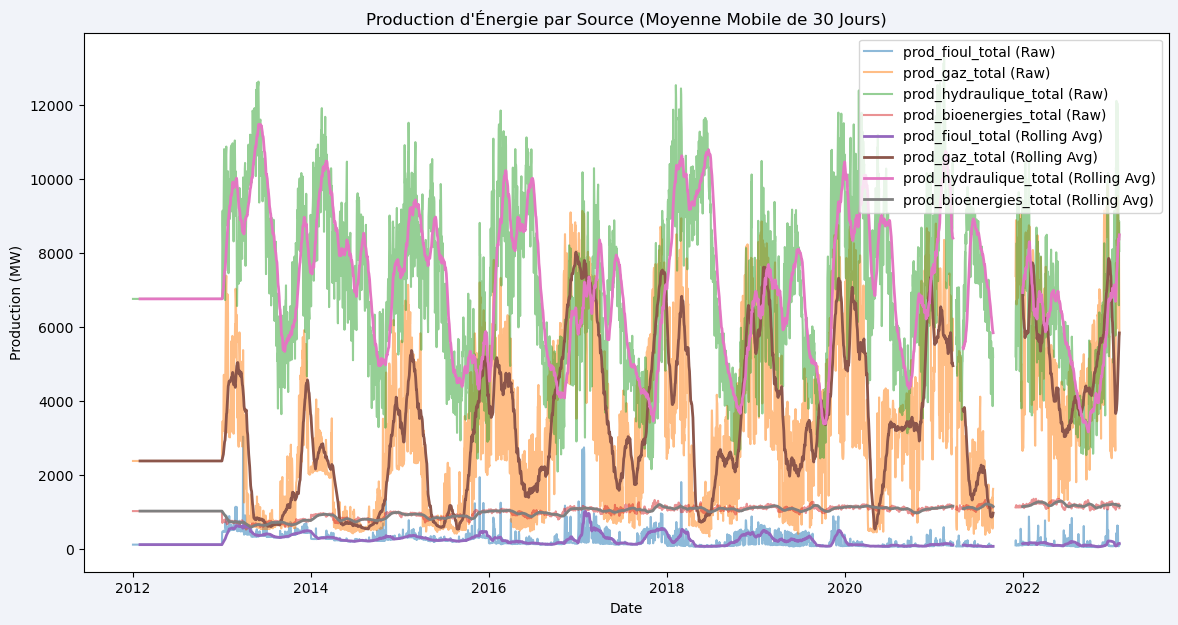

In [57]:
production_columns = [
    "prod_fioul_total", "prod_gaz_total", "prod_hydraulique_total",
    "prod_bioenergies_total"
]

production_data = data_cons_df[production_columns].copy()

production_data_daily = production_data.resample('D').mean()

# Calculate the rolling mean with the desired window size
rolling_window = 30  # 30 days
production_data_rolling = production_data_daily.rolling(window=rolling_window).mean()

plt.figure(figsize=(14, 7))

# Plot the raw data
for col in production_columns:
    plt.plot(production_data_daily.index, production_data_daily[col], label=f'{col} (Raw)', alpha=0.5)

# Plot the rolling average
for col in production_columns:
    plt.plot(production_data_rolling.index, production_data_rolling[col], label=f'{col} (Rolling Avg)', linewidth=2)

plt.xlabel('Date')
plt.ylabel('Production (MW)')
plt.title(f'Production d\'Énergie par Source (Moyenne Mobile de {rolling_window} Jours)')
plt.legend()
plt.show()

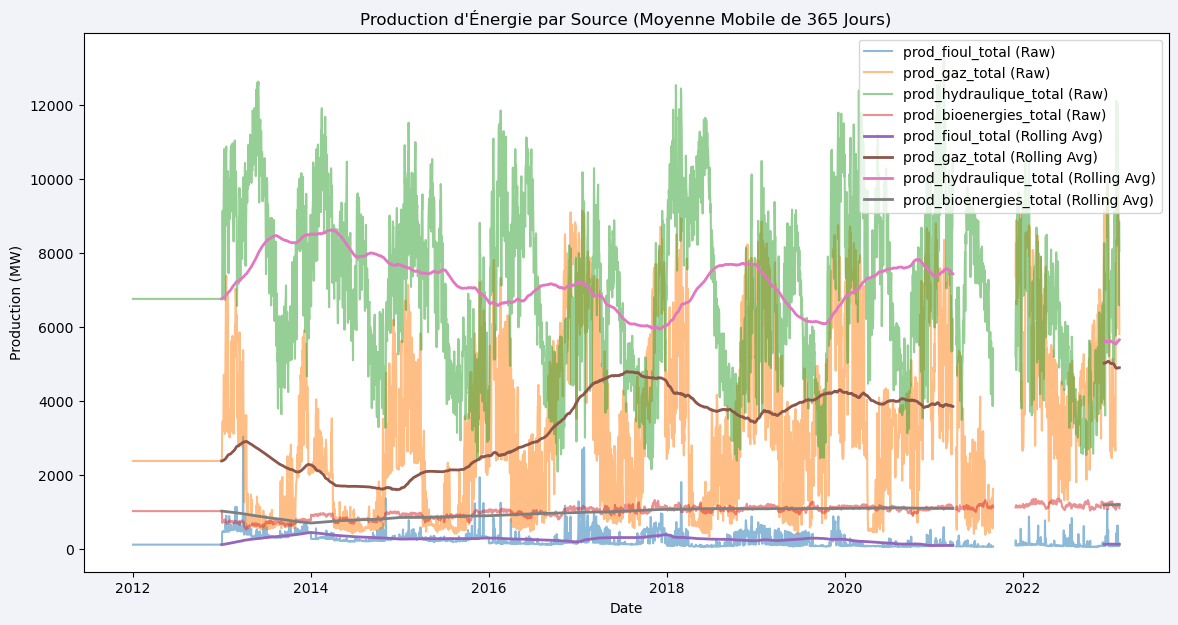

In [59]:
production_columns = [
    "prod_fioul_total", "prod_gaz_total", "prod_hydraulique_total",
    "prod_bioenergies_total"
]

production_data = data_cons_df[production_columns].copy()

production_data_daily = production_data.resample('D').mean()

# Define the rolling window for one year (365 days)
rolling_window = 365  # Number of days in a year

# Calculate the rolling mean with the desired window size
production_data_rolling = production_data_daily.rolling(window=rolling_window).mean()

plt.figure(figsize=(14, 7))

# Plot the raw data
for col in production_columns:
    plt.plot(production_data_daily.index, production_data_daily[col], label=f'{col} (Raw)', alpha=0.5)

# Plot the rolling average
for col in production_columns:
    plt.plot(production_data_rolling.index, production_data_rolling[col], label=f'{col} (Rolling Avg)', linewidth=2)

plt.xlabel('Date')
plt.ylabel('Production (MW)')
plt.title(f'Production d\'Énergie par Source (Moyenne Mobile de {rolling_window} Jours)')
plt.legend()
plt.show()

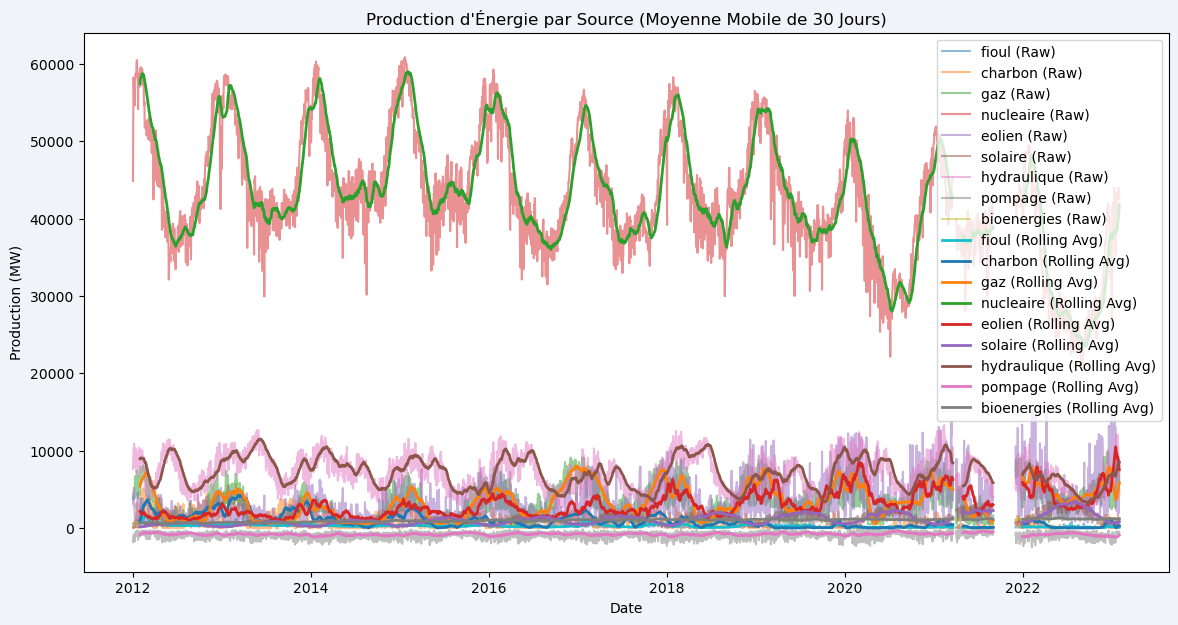

In [60]:
source_list = ['fioul', 'charbon', 'gaz', 'nucleaire',
               'eolien', 'solaire', 'hydraulique', 'pompage',
               'bioenergies']

production_data = data_cons_df[source_list].copy()

production_data['total_production'] = production_data.sum(axis=1)

# Let us resample the data to some frequency and compute the mean
production_data_daily = production_data.resample('D').mean()

# Calculate the rolling mean with the desired window size
rolling_window = 30  # 30 days
production_data_rolling = production_data_daily.rolling(window=rolling_window).mean()

plt.figure(figsize=(14, 7))

# Plot the raw data
for col in source_list:
    plt.plot(production_data_daily.index, production_data_daily[col], label=f'{col} (Raw)', alpha=0.5)

# Plot the rolling average
for col in source_list:
    plt.plot(production_data_rolling.index, production_data_rolling[col], label=f'{col} (Rolling Avg)', linewidth=2)

plt.xlabel('Date')
plt.ylabel('Production (MW)')
plt.title(f'Production d\'Énergie par Source (Moyenne Mobile de {rolling_window} Jours)')
plt.legend()
plt.show()

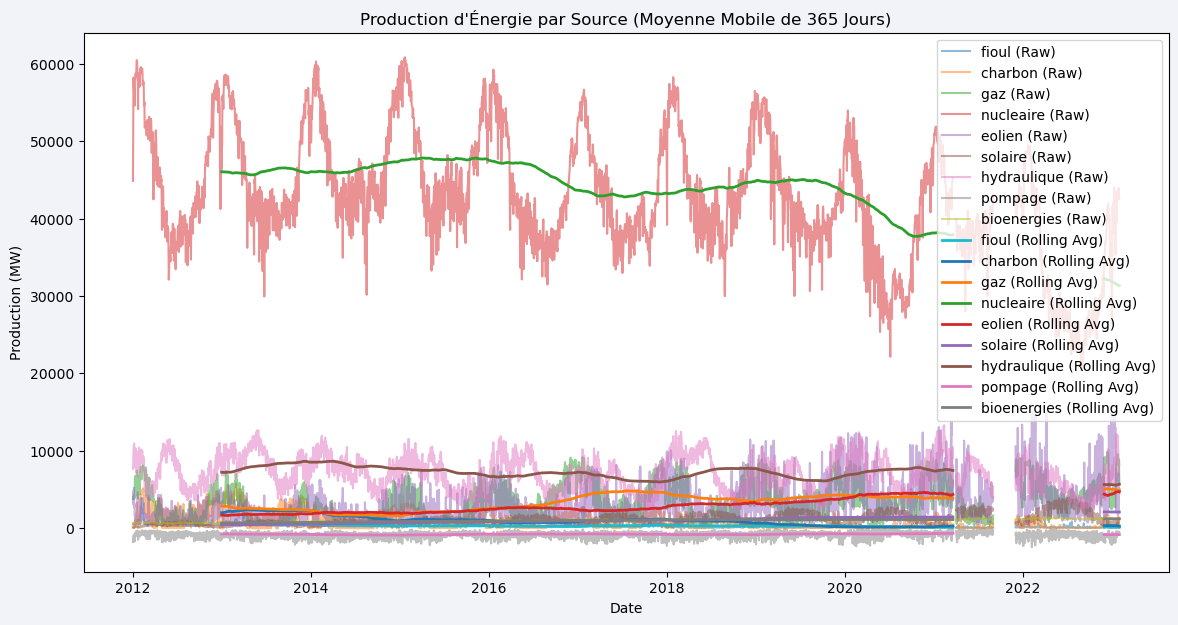

In [61]:
source_list = ['fioul', 'charbon', 'gaz', 'nucleaire',
               'eolien', 'solaire', 'hydraulique', 'pompage',
               'bioenergies']

production_data = data_cons_df[source_list].copy()

production_data['total_production'] = production_data.sum(axis=1)

production_data_daily = production_data.resample('D').mean()

# Define the rolling window for one year (365 days)
rolling_window = 365  # Number of days in a year

# Calculate the rolling mean with the desired window size
production_data_rolling = production_data_daily.rolling(window=rolling_window).mean()

plt.figure(figsize=(14, 7))

# Plot the raw data
for col in source_list:
    plt.plot(production_data_daily.index, production_data_daily[col], label=f'{col} (Raw)', alpha=0.5)

# Plot the rolling average
for col in source_list:
    plt.plot(production_data_rolling.index, production_data_rolling[col], label=f'{col} (Rolling Avg)', linewidth=2)

plt.xlabel('Date')
plt.ylabel('Production (MW)')
plt.title(f'Production d\'Énergie par Source (Moyenne Mobile de {rolling_window} Jours)')
plt.legend()
plt.show()

### - Quelle est l'évolution de la part des énergies fossiles dans le mix énergétique ?
### - Quelle est l'évolution de la part des énergies renouvelables dans le mix énergétique français ?

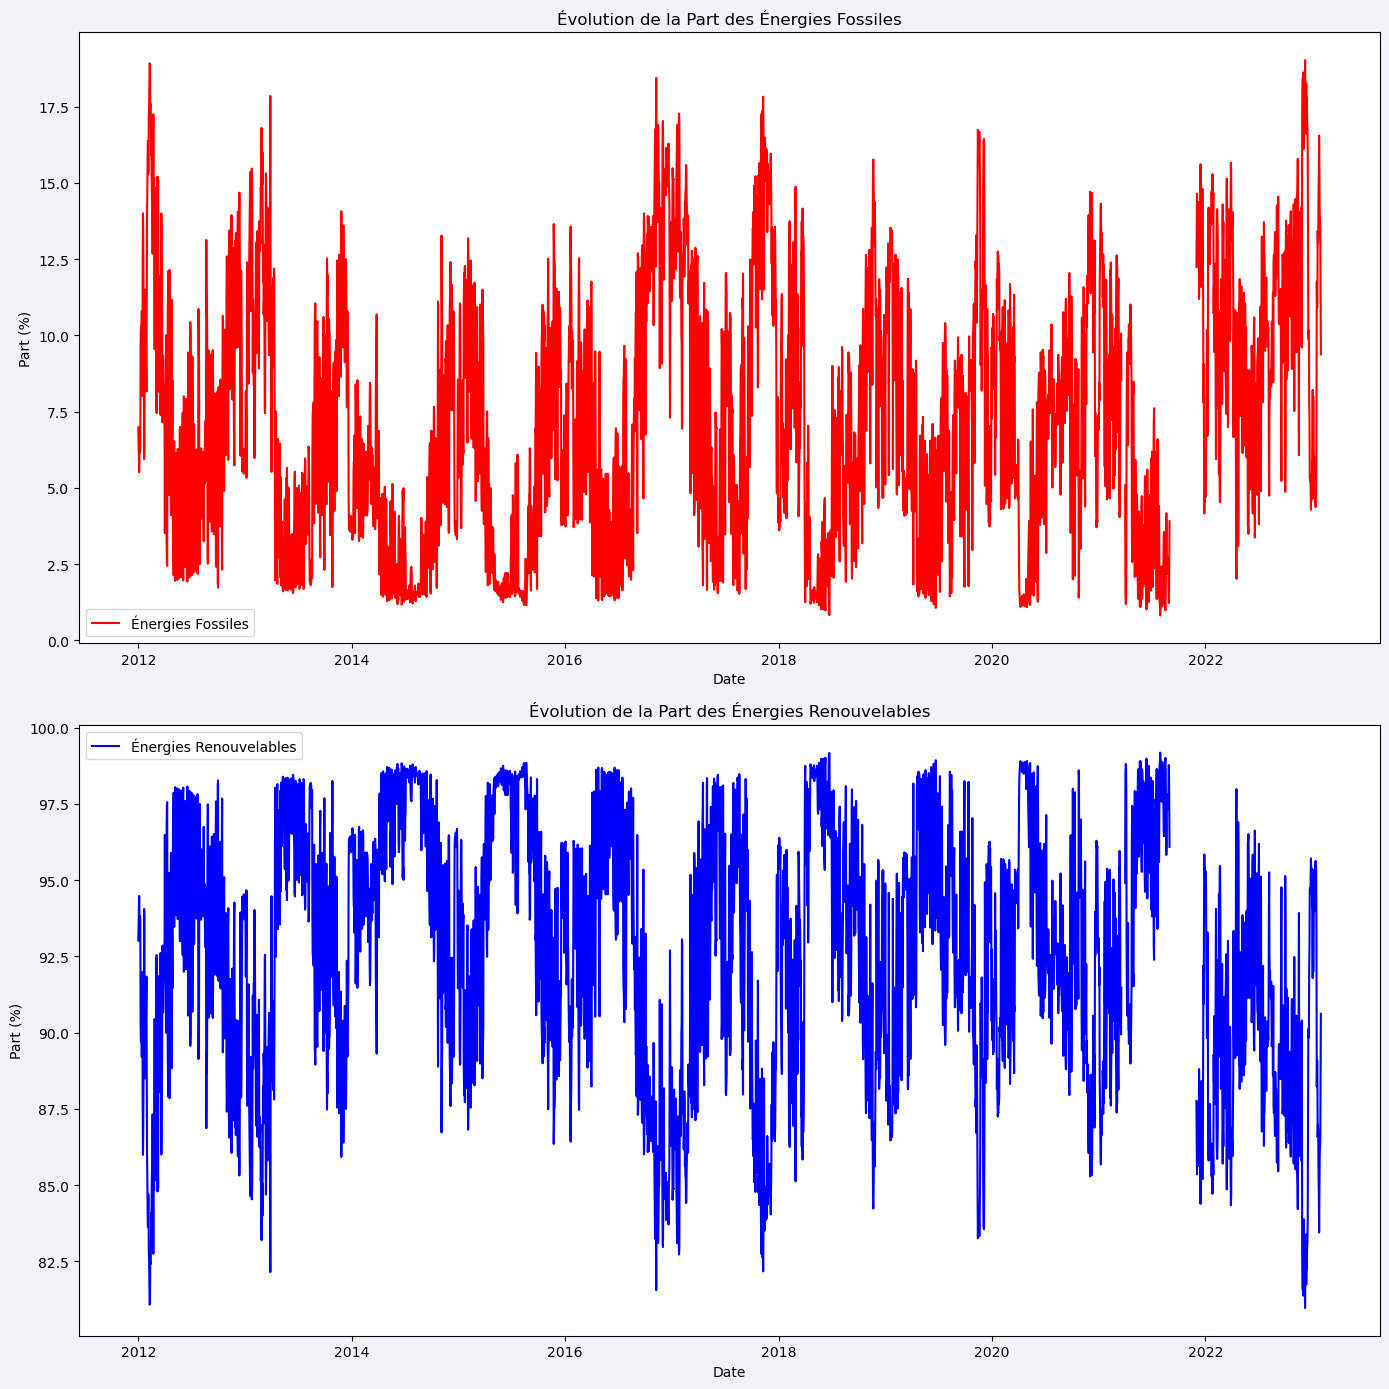

In [65]:
source_list = ['fioul', 'charbon', 'gaz', 'nucleaire',
               'eolien', 'solaire', 'hydraulique', 'bioenergies']

production_data = data_cons_df[source_list].copy()
production_data['total_production'] = production_data.sum(axis=1)
production_data = production_data.resample('D').mean()

fossil_columns = ['fioul', 'charbon', 'gaz']
renewable_columns = ['nucleaire', 'eolien', 'solaire', 'hydraulique', 'bioenergies']

production_data['fossil_share'] = production_data[fossil_columns].sum(axis=1) / production_data['total_production'] * 100
production_data['renewable_share'] = production_data[renewable_columns].sum(axis=1) / production_data['total_production'] * 100

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 14))

ax1.plot(production_data.index, production_data['fossil_share'], label='Énergies Fossiles', color='red')
ax1.set_xlabel('Date')
ax1.set_ylabel('Part (%)')
ax1.set_title('Évolution de la Part des Énergies Fossiles')
ax1.legend()

ax2.plot(production_data.index, production_data['renewable_share'], label='Énergies Renouvelables', color='blue')
ax2.set_xlabel('Date')
ax2.set_ylabel('Part (%)')
ax2.set_title('Évolution de la Part des Énergies Renouvelables')
ax2.legend()

plt.tight_layout()
plt.show()


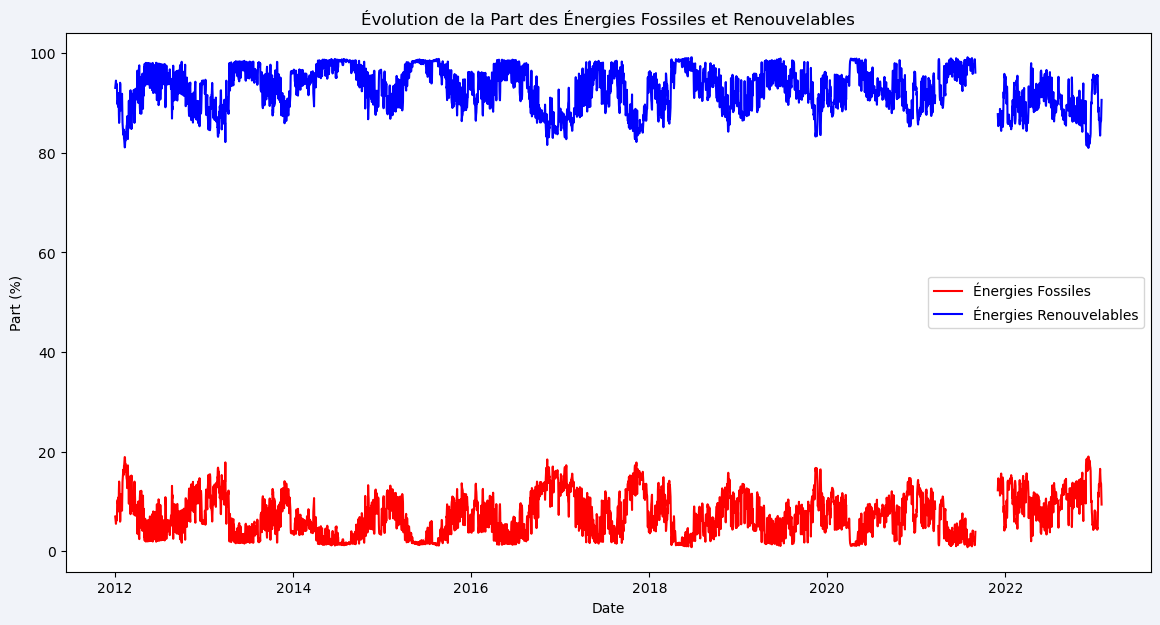

In [63]:
source_list = ['fioul', 'charbon', 'gaz', 'nucleaire',
               'eolien', 'solaire', 'hydraulique', 'bioenergies']

production_data = data_cons_df[source_list].copy()
production_data['total_production'] = production_data.sum(axis=1)
production_data = production_data.resample('D').mean()

fossil_columns = ['fioul', 'charbon', 'gaz']
renewable_columns = ['nucleaire', 'eolien', 'solaire', 'hydraulique', 'bioenergies']

production_data['fossil_share'] = production_data[fossil_columns].sum(axis=1) / production_data['total_production'] * 100
production_data['renewable_share'] = production_data[renewable_columns].sum(axis=1) / production_data['total_production'] * 100

fig = plt.figure(figsize=(14, 7))
ax1 = fig.add_subplot()

# Plot fossil share
ax1.plot(production_data.index, production_data['fossil_share'], label='Énergies Fossiles', color='red')

# Plot renewable share
ax1.plot(production_data.index, production_data['renewable_share'], label='Énergies Renouvelables', color='blue')

ax1.set_xlabel('Date')
ax1.set_ylabel('Part (%)')
ax1.set_title('Évolution de la Part des Énergies Fossiles et Renouvelables')
ax1.legend()

plt.show()

### - Quelle est la part de chaque filière de production d'énergies renouvelables (hydraulique, solaire, ...)

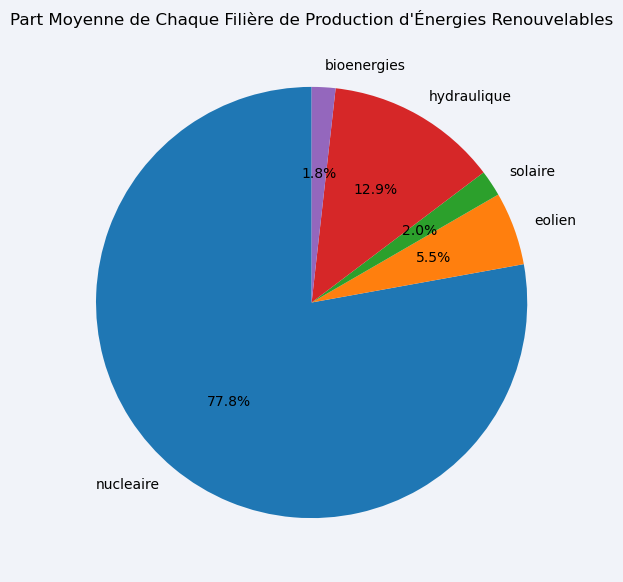

In [64]:
source_list = ['fioul', 'charbon', 'gaz', 'nucleaire',
               'eolien', 'solaire', 'hydraulique', 'bioenergies']

production_data = data_cons_df[source_list].copy()
renewable_columns = ['nucleaire', 'eolien', 'solaire', 'hydraulique', 'bioenergies']

# Part de chaque filière de production d'énergies renouvelables
renewable_shares = production_data[renewable_columns].mean()

plt.figure(figsize=(10, 7))
renewable_shares.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Part Moyenne de Chaque Filière de Production d\'Énergies Renouvelables')
plt.ylabel('')
plt.show()

### Part 3

- **Autonomie électrique** :
    - comparer la production totale française à la consommation totale. Quelle est le taux d'indépendance énergétique de la france au cours du temps ? C'est à dire la proportion du temps où la France est autonome en énergie. Faire le caclul sur la durée totale mais aussi par année et par mois.
    - Trouver les outliers    

In [ ]:
source_list = ['fioul', 'charbon', 'gaz', 'nucleaire',
               'eolien', 'solaire', 'hydraulique', 'bioenergies']

production_data = data_cons_df[source_list].copy()
production_data['total_production'] = production_data.sum(axis=1)
production_data = production_data.resample('D').mean()

#### just to remember

In [72]:
data_cons_df[["consommation", "cons_total_sans_ech_phys", "ech_physiques"]]

consommation  cons_total_sans_ech_phys  ech_physiques
date                                                                      
2015-12-16 03:00:00       54421.0                   64280.0        -9858.0
2015-12-16 05:00:00       52632.0                   64936.0       -12304.0
2015-12-16 07:00:00       63733.0                   74121.0       -10388.0
2015-12-16 11:00:00       67650.0                   79310.0       -11661.0
2015-12-16 14:00:00       65899.0                   78502.0       -12603.0
...                           ...                       ...            ...
2020-12-31 09:00:00       66832.0                   65378.0         1454.0
2020-12-31 12:30:00       70902.0                   68405.0         2497.0
2020-12-31 13:30:00       69956.0                   68870.0         1084.0
2020-12-31 16:00:00       65098.0                   67346.0        -2248.0
2020-12-31 19:00:00       70394.0                   69622.0          772.0

[189408 rows x 3 columns]

In [68]:
'''
data["ech_comm_total"] = (data["ech_comm_angleterre"] + data["ech_comm_espagne"] + 
                          data["ech_comm_italie"] + data["ech_comm_suisse"] + 
                          data["ech_comm_allemagne_belgique"])

data["ech_total"] = data["ech_comm_total"] + data["ech_physiques"]

data["cons_total_sans_ech_phys"] = (data["pompage"] + data["fioul"] + data["charbon"] + 
                                    data["gaz"] + data["nucleaire"] + data["eolien"] + 
                                    data["solaire"] + data["hydraulique"] + data["bioenergies"])

data["prod_fioul_total"] = data["fioul_tac"] + data["fioul_cogen"] + data["fioul_autres"]
data["prod_gaz_total"] = data["gaz_tac"] + data["gaz_cogen"] + data["gaz_ccg"] + data["gaz_autres"]
data["prod_hydraulique_total"] = data["hydraulique_fil_eau_eclusee"] + data["hydraulique_lacs"] + data["hydraulique_step_turbinage"]
data["prod_bioenergies_total"] = data["bioenergies_dechets"] + data["bioenergies_biomasse"] + data["bioenergies_biogaz"]
'''

'\ndata["ech_comm_total"] = (data["ech_comm_angleterre"] + data["ech_comm_espagne"] + \n                          data["ech_comm_italie"] + data["ech_comm_suisse"] + \n                          data["ech_comm_allemagne_belgique"])\n\ndata["ech_total"] = data["ech_comm_total"] + data["ech_physiques"]\n\ndata["cons_total_sans_ech_phys"] = (data["pompage"] + data["fioul"] + data["charbon"] + \n                                    data["gaz"] + data["nucleaire"] + data["eolien"] + \n                                    data["solaire"] + data["hydraulique"] + data["bioenergies"])\n\ndata["prod_fioul_total"] = data["fioul_tac"] + data["fioul_cogen"] + data["fioul_autres"]\ndata["prod_gaz_total"] = data["gaz_tac"] + data["gaz_cogen"] + data["gaz_ccg"] + data["gaz_autres"]\ndata["prod_hydraulique_total"] = data["hydraulique_fil_eau_eclusee"] + data["hydraulique_lacs"] + data["hydraulique_step_turbinage"]\ndata["prod_bioenergies_total"] = data["bioenergies_dechets"] + data["bioenergies_biomasse"]

In [73]:
#data_cons_df['energy_independent'] = (data_cons_df['cons_total_sans_ech_phys'] <= 
#                                        data_cons_df['prod_fioul_total'] + data_cons_df['prod_gaz_total'] + 
#                                        data_cons_df['prod_hydraulique_total'] + data_cons_df['prod_bioenergies_total'])

data_cons_df['energy_independent'] = (data_cons_df['cons_total_sans_ech_phys'] <= 
                                        data_cons_df['consommation'])

# Overall energy independence rate
overall_energy_independence_rate = data_cons_df['energy_independent'].mean()
overall_energy_independence_rate

0.137333164385876

In [77]:
# By year
energy_independence_yearly = data_cons_df['energy_independent'].resample('YE').mean()

# By month
energy_independence_monthly = data_cons_df['energy_independent'].resample('ME').mean()

In [79]:
# difference between production and consumption

data_cons_df['production_total'] = (data_cons_df['prod_fioul_total'] + data_cons_df['prod_gaz_total'] + 
                                    data_cons_df['prod_hydraulique_total'] + data_cons_df['prod_bioenergies_total'])

data_cons_df['consumption_production_diff'] = data_cons_df['cons_total_sans_ech_phys'] - data_cons_df['production_total']

Outliers:

In [80]:
Q1 = data_cons_df['consumption_production_diff'].quantile(0.25)
Q3 = data_cons_df['consumption_production_diff'].quantile(0.75)
IQR = Q3 - Q1

In [81]:
# Define outliers

outliers = data_cons_df[(data_cons_df['consumption_production_diff'] < 
            (Q1 - 1.5 * IQR)) | (data_cons_df['consumption_production_diff'] > (Q3 + 1.5 * IQR))]

In [82]:
overall_energy_independence_rate, energy_independence_yearly, energy_independence_monthly, outliers

(0.137333164385876,
 date
 2012-12-31    0.053677
 2013-12-31    0.063356
 2014-12-31    0.002626
 2015-12-31    0.002740
 2016-12-31    0.121414
 2017-12-31    0.144692
 2018-12-31    0.044521
 2019-12-31    0.074429
 2020-12-31    0.145378
 2021-12-31    0.195849
 2022-12-31    0.652854
 2023-12-31    0.442204
 Freq: YE-DEC, Name: energy_independent, dtype: float64,
 date
 2012-01-31    0.006048
 2012-02-29    0.585489
 2012-03-31    0.000000
 2012-04-30    0.005556
 2012-05-31    0.000000
                 ...   
 2022-09-30    0.945833
 2022-10-31    0.558468
 2022-11-30    0.654861
 2022-12-31    0.637097
 2023-01-31    0.442204
 Freq: ME, Name: energy_independent, Length: 133, dtype: float64,
                                   nature  consommation  prevision_j1  \
 date                                                                   
 2012-11-29 19:00:00  Données définitives       80609.0         79700   
 2012-11-30 18:00:00  Données définitives       77409.0         76800   
 

### Part 4

- **Equilibre du réseau électrique** : Vérifier que la production, la consommation et les échanges commerciaux s'équilibrent en permanence. <br/> Ressource pour comprendre : https://fr.wikipedia.org/wiki/Ajustement_offre-demande_d%27%C3%A9lectricit%C3%A9 

In [87]:
data_cons_df['net_exports'] = data_cons_df['ech_comm_total']
#data_cons_df['net_exports'] = data_cons_df['ech_total']

# balance equation: production_total = cons_total_sans_ech_phys + net_exports
data_cons_df['balance_check'] = data_cons_df['cons_total_sans_ech_phys'] - (data_cons_df['consommation'] + data_cons_df['net_exports'])

In [89]:
# Checking if the balance is maintained
balance_maintained = data_cons_df['balance_check'].abs().max() < 1e-6

balance_maintained

False

In [90]:
data_cons_df[['production_total', 'cons_total_sans_ech_phys', 'net_exports', 'balance_check']].head()

production_total  cons_total_sans_ech_phys  net_exports  \
date                                                                           
2015-12-16 03:00:00            6697.0                   64280.0     -11690.0   
2015-12-16 05:00:00            6608.0                   64936.0     -10885.0   
2015-12-16 07:00:00           10380.0                   74121.0      -9983.0   
2015-12-16 11:00:00           14339.0                   79310.0     -12284.0   
2015-12-16 14:00:00           13167.0                   78502.0     -12230.0   

                     balance_check  
date                                
2015-12-16 03:00:00        21549.0  
2015-12-16 05:00:00        23189.0  
2015-12-16 07:00:00        20371.0  
2015-12-16 11:00:00        23944.0  
2015-12-16 14:00:00        24833.0

### Part 5

- **Analyser la tendance des données** :
    - Analyser la saisonnalité des productions, comparer les mois de l'année entre eux. Quand consomme-t-on le plus ?
    - Printemps vs Eté vs Automne vs Hiver ?
    - Quelle est la tendance générale de l'évolution à long terme de la production d'énergie solaire ?
    - Quelle est la tendance générale de l'évolution à long terme de l'émission de CO2 ?

In [110]:
source_list = ['fioul', 'charbon', 'gaz', 'nucleaire',
               'eolien', 'solaire', 'hydraulique', 'bioenergies']

data_cons_df['production_total'] = (data_cons_df['prod_fioul_total'] + data_cons_df['prod_gaz_total'] + 
                                    data_cons_df['prod_hydraulique_total'] + data_cons_df['prod_bioenergies_total'])

production_data = data_cons_df[source_list + ["cons_total_sans_ech_phys", "production_total"]].copy()

In [111]:
monthly_data = production_data.resample('ME').mean()
monthly_data

fioul      charbon          gaz     nucleaire       eolien  \
date                                                                           
2012-01-31   600.284274  1033.447581  5477.798387  57495.315188  2130.765457   
2012-02-29  1487.602730  3672.319684  7160.056034  55535.587644  1610.747126   
2012-03-31   588.436156  1963.383065  4419.214382  50482.514113  1310.648522   
2012-04-30   490.039583  2290.597222  1954.073611  45939.453472  2178.555556   
2012-05-31   353.494624  1147.012097   829.843414  39021.690188  1306.898522   
...                 ...          ...          ...           ...          ...   
2022-09-30   104.384722    14.562500  4362.647222  25241.186111  3176.536806   
2022-10-31    69.683468    41.405242  4966.426075  27132.809812  4719.272177   
2022-11-30    85.668750   313.680556  6033.918750  29967.543750  6746.040972   
2022-12-31   200.038978   968.347446  6642.005376  37499.780914  6203.369624   
2023-01-31   141.690188   301.467742  5745.309812  41326.846102  7609.536290   

                solaire   hydraulique  bioenergies  cons_total_sans_ech_phys  \
date                                                                           
2012-01-31   156.615591   8986.866263   698.395833              75757.588710   
2012-02-29   290.697557   7474.890086   663.914511              77295.280891   
2012-03-31   447.295699   5202.025538   726.210349              64550.484543   
2012-04-30   426.707639   7306.412500   569.984722              60442.048611   
2012-05-31   572.397849  10253.005376   634.311156              53249.493952   
...                 ...           ...          ...                       ...   
2022-09-30  2452.897917   3376.359722  1225.828472              39094.434028   
2022-10-31  1676.960349   4062.478495  1114.683468              42760.344086   
2022-11-30  1113.959028   5342.095139  1185.126389              49726.186806   
2022-12-31   631.893145   6845.221102  1214.782258              59084.860215   
2023-01-31   812.468414   8427.405914  1177.948253              64618.115591   

            production_total  
date                          
2012-01-31      10305.000000  
2012-02-29      10305.000000  
2012-03-31      10305.000000  
2012-04-30      10305.000000  
2012-05-31      10305.000000  
...                      ...  
2022-09-30       9070.152778  
2022-10-31      10214.816532  
2022-11-30      12653.872222  
2022-12-31      14910.354167  
2023-01-31      15501.903898  

[133 rows x 10 columns]

<Figure size 1400x600 with 0 Axes>

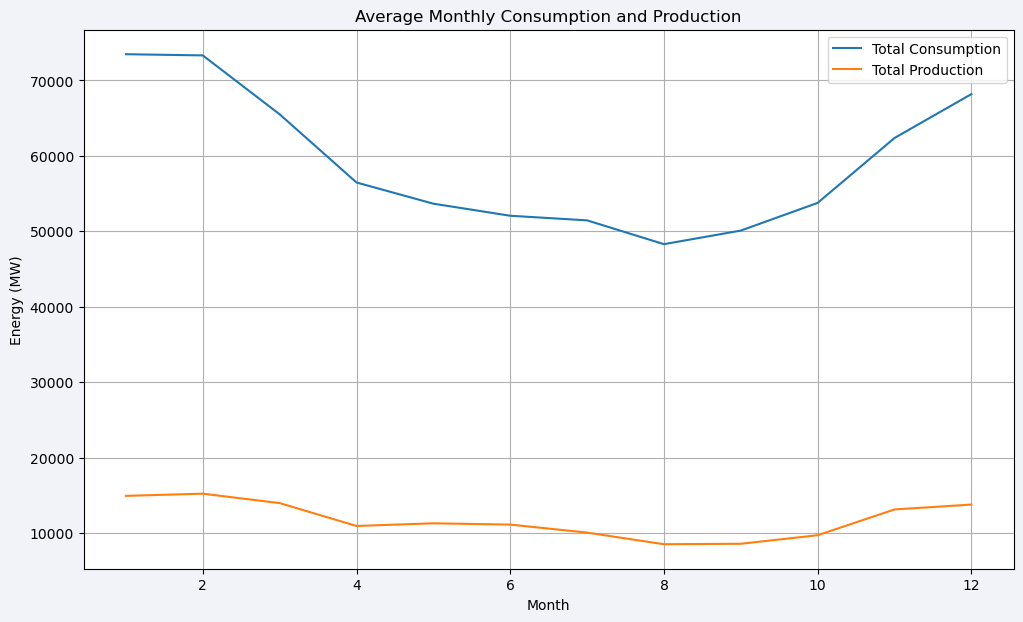

In [112]:
# Seasonality and Compare Months

plt.figure(figsize=(14, 6))
monthly_data[['cons_total_sans_ech_phys', 'production_total']].groupby(monthly_data.index.month).mean().plot()
plt.title('Average Monthly Consumption and Production')
plt.xlabel('Month')
plt.ylabel('Energy (MW)')
plt.legend(['Total Consumption', 'Total Production'])
plt.grid(True)
plt.show()

#### o grafico acima esta errado: eu estou usando como "producao" as producoes de tecnologia a partir das fontes;
problema esta aqui:

data_cons_df['production_total'] = (data_cons_df['prod_fioul_total'] + data_cons_df['prod_gaz_total'] + 
                                    data_cons_df['prod_hydraulique_total'] + data_cons_df['prod_bioenergies_total'])

### Seasonal Consumption

In [116]:
source_list = ['fioul', 'charbon', 'gaz', 'nucleaire',
               'eolien', 'solaire', 'hydraulique', 'bioenergies']

data_cons_df['production_total'] = (data_cons_df['prod_fioul_total'] + data_cons_df['prod_gaz_total'] + 
                                    data_cons_df['prod_hydraulique_total'] + data_cons_df['prod_bioenergies_total'])

seasons = {
    1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Autumn', 10: 'Autumn', 11: 'Autumn', 12: 'Winter'
}

data_cons_df['season'] = data_cons_df.index.month.map(seasons)

production_data = data_cons_df[source_list + ["cons_total_sans_ech_phys", "production_total", "season"]].copy()

seasonal_data = production_data.groupby('season').mean()
seasonal_data

fioul      charbon          gaz     nucleaire       eolien  \
season                                                                    
Autumn  284.963530  1146.965705  3768.765820  40867.650641  2941.690133   
Spring  254.850250   750.910062  2730.333667  42140.796604  2992.807958   
Summer  190.048769   431.885746  1901.783185  37533.887269  1928.557415   
Winter  369.622558  1280.295589  5511.162882  51370.353552  4275.136858   

            solaire  hydraulique  bioenergies  cons_total_sans_ech_phys  \
season                                                                    
Autumn   908.049679  5342.494757   958.170536              55398.026122   
Spring  1279.101167  8153.899625   974.902312              58492.657354   
Summer  1612.606472  6716.310627   965.161726              50590.135170   
Winter   535.668785  8178.381189  1030.913759              71677.521786   

        production_total  
season                    
Autumn      10457.715293  
Spring      12037.351125  
Summer       9879.570570  
Winter      14623.172404

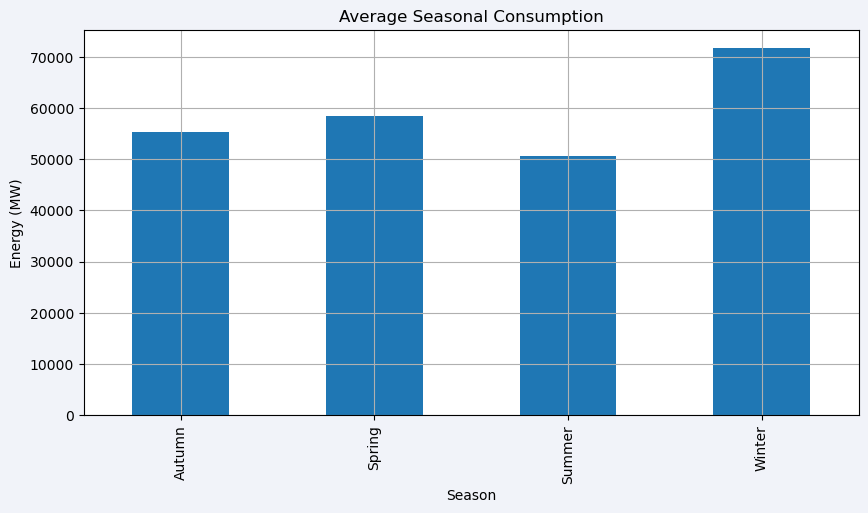

In [117]:
# Plot average consumption for each season
plt.figure(figsize=(10, 5))
seasonal_data['cons_total_sans_ech_phys'].plot(kind='bar')
plt.title('Average Seasonal Consumption')
plt.xlabel('Season')
plt.ylabel('Energy (MW)')
plt.grid(True)
plt.show()

#### Trend in Solar Energy Production

/tmp/ipykernel_6288/2990989021.py:2: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_solar = data_cons_df['solaire'].resample('A').mean()


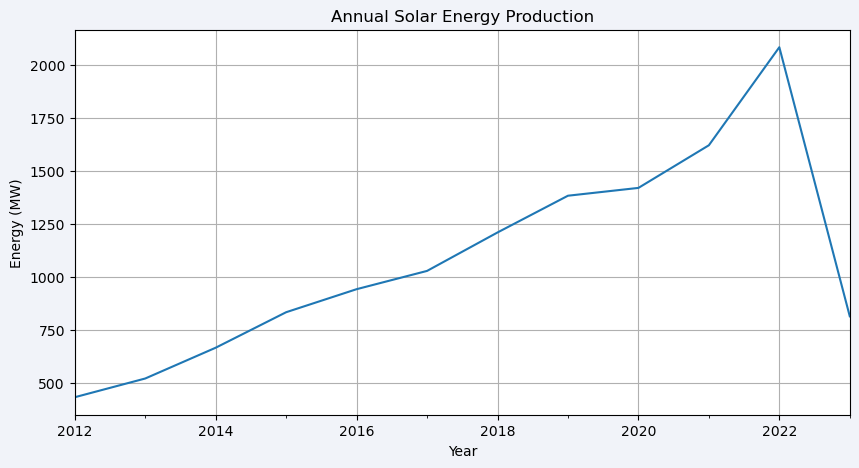

In [118]:
# Resample to annual data for long-term trend analysis
annual_solar = data_cons_df['solaire'].resample('A').mean()

# Plot the trend in solar energy production
plt.figure(figsize=(10, 5))
annual_solar.plot()
plt.title('Annual Solar Energy Production')
plt.xlabel('Year')
plt.ylabel('Energy (MW)')
plt.grid(True)
plt.show()

#### Trend in CO2 Emissions

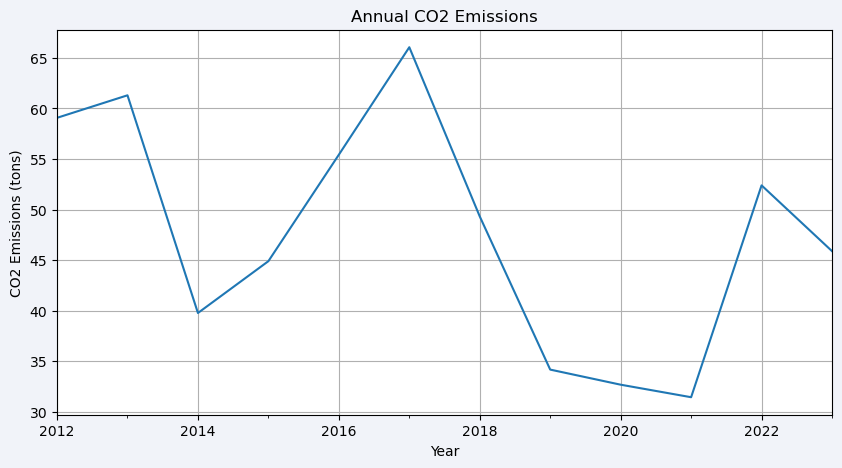

In [122]:
annual_co2 = data_cons_df['taux_co2'].resample('1YE').mean()

plt.figure(figsize=(10, 5))
annual_co2.plot()
plt.title('Annual CO2 Emissions')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (tons)')
plt.grid(True)
plt.show()

### Part 6

- **Impact des sources primaires de production sur le Taux de CO2** :
    - Corrélez les données entre elles et déduisez-en l'impact positif ou négatif de chacune des sources de production sur l'estimation du taux de CO2 émis.
    <br/> **Pandas** : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
    <br/> **Théorie** : https://data36.com/correlation-definition-calculation-corr-pandas/

In [123]:
source_list = ['fioul', 'charbon', 'gaz', 'nucleaire',
               'eolien', 'solaire', 'hydraulique', 'bioenergies']

data_cons_df['production_total'] = (data_cons_df['prod_fioul_total'] + data_cons_df['prod_gaz_total'] + 
                                    data_cons_df['prod_hydraulique_total'] + data_cons_df['prod_bioenergies_total'])

production_data = data_cons_df[source_list + 
            ["taux_co2", "prod_fioul_total", "prod_gaz_total",
            "prod_hydraulique_total", "prod_bioenergies_total"]].copy()

correlation_matrix = production_data.corr()

In [124]:
correlation_matrix

fioul   charbon       gaz  nucleaire    eolien  \
fioul                   1.000000  0.478178  0.286416   0.393982 -0.158120   
charbon                 0.478178  1.000000  0.269647   0.464474 -0.229102   
gaz                     0.286416  0.269647  1.000000   0.304227  0.139696   
nucleaire               0.393982  0.464474  0.304227   1.000000 -0.016985   
eolien                 -0.158120 -0.229102  0.139696  -0.016985  1.000000   
solaire                -0.128158 -0.175185 -0.039273  -0.284491 -0.060972   
hydraulique             0.205579  0.196822  0.165258   0.342641 -0.028120   
bioenergies            -0.330666 -0.466873  0.367843  -0.255635  0.375459   
taux_co2                0.496654  0.809523  0.643175   0.310224 -0.209049   
prod_fioul_total        0.761002  0.338586  0.292489   0.331300 -0.121167   
prod_gaz_total          0.201338  0.206916  0.958822   0.237766  0.151067   
prod_hydraulique_total  0.168620  0.167774  0.158082   0.338562 -0.024718   
prod_bioenergies_total -0.209501 -0.343276  0.377561  -0.236829  0.340726   

                         solaire  hydraulique  bioenergies  taux_co2  \
fioul                  -0.128158     0.205579    -0.330666  0.496654   
charbon                -0.175185     0.196822    -0.466873  0.809523   
gaz                    -0.039273     0.165258     0.367843  0.643175   
nucleaire              -0.284491     0.342641    -0.255635  0.310224   
eolien                 -0.060972    -0.028120     0.375459 -0.209049   
solaire                 1.000000    -0.069601     0.160561 -0.172226   
hydraulique            -0.069601     1.000000    -0.150780  0.029228   
bioenergies             0.160561    -0.150780     1.000000 -0.140345   
taux_co2               -0.172226     0.029228    -0.140345  1.000000   
prod_fioul_total       -0.093477     0.207135    -0.135791  0.430980   
prod_gaz_total         -0.029864     0.152190     0.403769  0.596101   
prod_hydraulique_total -0.069703     0.955451    -0.123910  0.012718   
prod_bioenergies_total  0.113147    -0.167925     0.815404 -0.066144   

                        prod_fioul_total  prod_gaz_total  \
fioul                           0.761002        0.201338   
charbon                         0.338586        0.206916   
gaz                             0.292489        0.958822   
nucleaire                       0.331300        0.237766   
eolien                         -0.121167        0.151067   
solaire                        -0.093477       -0.029864   
hydraulique                     0.207135        0.152190   
bioenergies                    -0.135791        0.403769   
taux_co2                        0.430980        0.596101   
prod_fioul_total                1.000000        0.311383   
prod_gaz_total                  0.311383        1.000000   
prod_hydraulique_total          0.223897        0.165800   
prod_bioenergies_total         -0.270594        0.389198   

                        prod_hydraulique_total  prod_bioenergies_total  
fioul                                 0.168620               -0.209501  
charbon                               0.167774               -0.343276  
gaz                                   0.158082                0.377561  
nucleaire                             0.338562               -0.236829  
eolien                               -0.024718                0.340726  
solaire                              -0.069703                0.113147  
hydraulique                           0.955451               -0.167925  
bioenergies                          -0.123910                0.815404  
taux_co2                              0.012718               -0.066144  
prod_fioul_total                      0.223897               -0.270594  
prod_gaz_total                        0.165800                0.389198  
prod_hydraulique_total                1.000000               -0.176678  
prod_bioenergies_total               -0.176678                1.000000

In [125]:
co2_correlations = correlation_matrix['taux_co2'].drop('taux_co2')
co2_correlations

fioul                     0.496654
charbon                   0.809523
gaz                       0.643175
nucleaire                 0.310224
eolien                   -0.209049
solaire                  -0.172226
hydraulique               0.029228
bioenergies              -0.140345
prod_fioul_total          0.430980
prod_gaz_total            0.596101
prod_hydraulique_total    0.012718
prod_bioenergies_total   -0.066144
Name: taux_co2, dtype: float64

### Part 7

- [Bonus] **Analyser les périodicités des données** :
    - Réaliser une analyse de Fourier de vos séries temporelles
      <br/> **Théorie et pratique** : https://realpython.com/python-scipy-fft/

### Part 8

- **Géopolitique** :
    - Visualisez et analysez l'impact du COVID et de la guerre en Ukraine sur le réseau électrique ?
